# EDA Danych dotyczących Titanica

## O Danych

Dane o pasażerach Titanica

Zbiór danych zawiera informacje o pasażerach RMS Titanic, który zatonął 15 kwietnia 1912 roku po zderzeniu z górą
lodową. Dane obejmują takie atrybuty jak klasa podróży, wiek, płeć, liczba rodzeństwa/małżonków na pokładzie,
liczba rodziców/dzieci na pokładzie, cena biletu oraz miejsce zaokrętowania.

Zbiór zawiera także informację o tym, czy pasażer przeżył katastrofę.

Titanic przewoził ponad 2,200 osób, z czego ponad 1,500 zginęło, co czyni tę katastrofę jedną z najbardziej
tragicznych w historii morskiej.

Kolumny:

* **pclass** - Klasa biletu
* **survived** - Czy pasażer przeżył katastrofę
* **name** - Imię i nazwisko pasażera
* **sex** - Płeć pasażera
* **age** - Wiek pasażera
* **sibsp** - Liczba rodzeństwa/małżonków na pokładzie
* **parch** - Liczba rodziców/dzieci na pokładzie
* **ticket** - Numer biletu
* **fare** - Cena biletu
* **cabin** - Numer kabiny
* **embarked** - Port, w którym pasażer wszedł na pokład (C = Cherbourg, Q = Queenstown, S = Southampton)
* **boat** - Numer łodzi ratunkowej
* **body** - Numer ciała (jeśli pasażer nie przeżył i ciało zostało odnalezione)
* **home.dest** - Miejsce docelowe

In [61]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

pd.set_option('display.max_columns', None)

## 1. Ogólny przegląd danych i analiza brakujących wartości

In [62]:
df = pd.read_csv('26__titanic.csv', sep=",")
df

pclass  survived                                             name  \
0        1.0       1.0                    Allen, Miss. Elisabeth Walton   
1        1.0       1.0                   Allison, Master. Hudson Trevor   
2        1.0       0.0                     Allison, Miss. Helen Loraine   
3        1.0       0.0             Allison, Mr. Hudson Joshua Creighton   
4        1.0       0.0  Allison, Mrs. Hudson J C (Bessie Waldo Daniels)   
...      ...       ...                                              ...   
1305     3.0       0.0                            Zabour, Miss. Thamine   
1306     3.0       0.0                        Zakarian, Mr. Mapriededer   
1307     3.0       0.0                              Zakarian, Mr. Ortin   
1308     3.0       0.0                               Zimmerman, Mr. Leo   
1309     NaN       NaN                                              NaN   

         sex      age  sibsp  parch  ticket      fare    cabin embarked boat  \
0     female  29.0000    0.0    0.0   24160  211.3375       B5        S    2   
1       male   0.9167    1.0    2.0  113781  151.5500  C22 C26        S   11   
2     female   2.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
3       male  30.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
4     female  25.0000    1.0    2.0  113781  151.5500  C22 C26        S  NaN   
...      ...      ...    ...    ...     ...       ...      ...      ...  ...   
1305  female      NaN    1.0    0.0    2665   14.4542      NaN        C  NaN   
1306    male  26.5000    0.0    0.0    2656    7.2250      NaN        C  NaN   
1307    male  27.0000    0.0    0.0    2670    7.2250      NaN        C  NaN   
1308    male  29.0000    0.0    0.0  315082    7.8750      NaN        S  NaN   
1309     NaN      NaN    NaN    NaN     NaN       NaN      NaN      NaN  NaN   

       body                        home.dest  
0       NaN                     St Louis, MO  
1       NaN  Montreal, PQ / Chesterville, ON  
2       NaN  Montreal, PQ / Chesterville, ON  
3     135.0  Montreal, PQ / Chesterville, ON  
4       NaN  Montreal, PQ / Chesterville, ON  
...     ...                              ...  
1305    NaN                              NaN  
1306  304.0                              NaN  
1307    NaN                              NaN  
1308    NaN                              NaN  
1309    NaN                              NaN  

[1310 rows x 14 columns]

In [63]:
# Informacje o dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1310 entries, 0 to 1309
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   float64
 1   survived   1309 non-null   float64
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   float64
 6   parch      1309 non-null   float64
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  boat       486 non-null    object 
 12  body       121 non-null    float64
 13  home.dest  745 non-null    object 
dtypes: float64(7), object(7)
memory usage: 143.4+ KB


In [64]:
# Liczba unikalnych wartości w każdej kolumnie
unique_values = df.nunique()
print("Liczba unikalnych wartości w każdej kolumnie:")
print(unique_values)

Liczba unikalnych wartości w każdej kolumnie:
pclass          3
survived        2
name         1307
sex             2
age            98
sibsp           7
parch           8
ticket        929
fare          281
cabin         186
embarked        3
boat           27
body          121
home.dest     369
dtype: int64


In [65]:
# Liczba brakujących wartości w każdej kolumnie
missing_values = df.isnull().sum()
print("Liczba brakujących wartości w każdej kolumnie:")
print(missing_values)

Liczba brakujących wartości w każdej kolumnie:
pclass          1
survived        1
name            1
sex             1
age           264
sibsp           1
parch           1
ticket          1
fare            2
cabin        1015
embarked        3
boat          824
body         1189
home.dest     565
dtype: int64


In [66]:
# Usunięcie kolumn 'ticket', 'cabin', 'boat', 'body' i 'home.dest' z dataframe
df.drop(columns=['ticket', 'cabin', 'boat', 'body', 'home.dest'], inplace=True)

# Ponowne sprawdzenie brakujących wartości w każdej kolumnie
missing_values = df.isnull().sum()
print("Liczba brakujących wartości w każdej kolumnie po usunięciu niektórych kolumn:")
print(missing_values)

Liczba brakujących wartości w każdej kolumnie po usunięciu niektórych kolumn:
pclass        1
survived      1
name          1
sex           1
age         264
sibsp         1
parch         1
fare          2
embarked      3
dtype: int64


In [67]:
# Uzupełnienie brakujących wartości w kolumnie `age` medianą wieku
df['age'].fillna(df['age'].median(), inplace=True)

# Uzupełnienie brakujących wartości w kolumnie `fare` medianą ceny biletu
df['fare'].fillna(df['fare'].median(), inplace=True)

# Uzupełnienie brakujących wartości w kolumnie `embarked` najczęstszą wartością
df['embarked'].fillna(df['embarked'].mode()[0], inplace=True)

# Uzupełnienie brakujących wartości w kolumnie `pclass` najczęstszą wartością
df['pclass'].fillna(df['pclass'].mode()[0], inplace=True)

# Uzupełnienie brakujących wartości w kolumnie `survived` najczęstszą wartością
df['survived'].fillna(df['survived'].mode()[0], inplace=True)

# Uzupełnienie brakujących wartości w kolumnie `sex` najczęstszą wartością
df['sex'].fillna(df['sex'].mode()[0], inplace=True)

# Uzupełnienie brakujących wartości w kolumnie `sibsp` najczęstszą wartością
df['sibsp'].fillna(df['sibsp'].mode()[0], inplace=True)

# Uzupełnienie brakujących wartości w kolumnie `parch` najczęstszą wartością
df['parch'].fillna(df['parch'].mode()[0], inplace=True)

# Zastąpienie brakujących wartości w kolumnie `name` wartością 'Unknown'
df['name'].fillna('Unknown', inplace=True)

# Ponowne sprawdzenie brakujących wartości w każdej kolumnie
missing_values = df.isnull().sum()
print("Liczba brakujących wartości w każdej kolumnie po uzupełnieniu:")
print(missing_values)

Liczba brakujących wartości w każdej kolumnie po uzupełnieniu:
pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
fare        0
embarked    0
dtype: int64


In [68]:
# Połączenie kolumn `sibsp` i `parch` w nową kolumnę `family_size`
df['family_size'] = df['sibsp'] + df['parch']

# Usunięcie kolumn `sibsp` i `parch`
df.drop(columns=['sibsp', 'parch'], inplace=True)

In [69]:
# Mapowanie dla kolumny `sex`
sex_mapping = {'male': 0, 'female': 1}
df['sex'] = df['sex'].map(sex_mapping)

# Sprawdzenie unikalnych wartości w kolumnie `embarked`
unique_embarked = df['embarked'].dropna().unique()
unique_embarked_sorted = sorted(unique_embarked)  # Sortowanie dla spójności

# Mapowanie dla kolumny `embarked`
embarked_mapping = {port: idx for idx, port in enumerate(unique_embarked_sorted)}
df['embarked'] = df['embarked'].map(embarked_mapping)

# Wyświetlenie zaktualizowanych wartości w kolumnach `sex` i `embarked`
print("Updated 'sex' column values:\n", df['sex'].unique())
print("Updated 'embarked' column values:\n", df['embarked'].unique())

# Wyświetlenie mapowania
print("Sex mapping:", sex_mapping)
print("Embarked mapping:", embarked_mapping)

# Stworzenie kopii ramki danych do PCA
df_pca = df.copy()

Updated 'sex' column values:
 [1 0]
Updated 'embarked' column values:
 [2 0 1]
Sex mapping: {'male': 0, 'female': 1}
Embarked mapping: {'C': 0, 'Q': 1, 'S': 2}


In [70]:
# Podsumowanie kolumn numerycznych
numerical_summary = df.describe()

# Wyświetlenie wyników
print("Podsumowanie kolumn numerycznych:")
print(numerical_summary)

Podsumowanie kolumn numerycznych:
            pclass     survived          sex          age         fare  \
count  1310.000000  1310.000000  1310.000000  1310.000000  1310.000000   
mean      2.295420     0.381679     0.355725    29.502036    33.266714   
std       0.837742     0.485984     0.478915    12.900383    51.724348   
min       1.000000     0.000000     0.000000     0.166700     0.000000   
25%       2.000000     0.000000     0.000000    22.000000     7.895800   
50%       3.000000     0.000000     0.000000    28.000000    14.454200   
75%       3.000000     1.000000     1.000000    35.000000    31.275000   
max       3.000000     1.000000     1.000000    80.000000   512.329200   

          embarked  family_size  
count  1310.000000  1310.000000  
mean      1.493893     0.883206  
std       0.814053     1.583222  
min       0.000000     0.000000  
25%       1.000000     0.000000  
50%       2.000000     0.000000  
75%       2.000000     1.000000  
max       2.000000    10.00

### Podsumowanie:

- Po siedem kolumn zawiera dane numeryczne i tekstowe.
- Najwięcej unikatowych wartości ma kolumna 'name' (1307) a najmniej kolumna 'sex' i 'embarked' (odpowiednio 2 i 3).
- Unikatowe wartości wskazują, że po katastrofie znaleziono tylko 121 ciał.
- Kolumny 'cabin', 'boat', 'body' i 'home.dest' mają najwięcej brakujących wartości i nie wniosą wielu informacji do analizy, dlatego zdecydowano się na ich usunięcie.
- Kolumna 'ticket' nie wnosi istotnych informacji do analizy, więc została usunięta.
- Brakujące wartości w kolumnie numerycznej 'age' i 'fare' zastąpiono medianą, ponieważ rozkłady wartości są skośne.
- Brakujące wartości w kolumnie 'embarked', 'pclass', 'survived', 'sex', 'sibsp', 'parch' zastąpiono najczęściej występują wartością.
- Brakującą wartość w kolumnie 'name' zastąpiono wartością 'Unknown'.
- W celu łatwiejszej analizy utworzono nową zmienną 'family_size', która powstała poprzez dodanie wartości z kolumny 'sibsp' i 'parch'.
- W celu łatwiejszej analizy wartości tekstowe w kolumnie 'sex' zastąpiono liczbowymi: 'male': 0, 'female': 1. To samo wykonano dla kolumny 'embarked': 'C': 0, 'Q': 1, 'S': 2.
- Już na początkowym etapie analizy za pomocą podsumowania kolumn numerycznych można stwierdzić, że większość pasażerów była mężczyznami, wsiadła na statek w porcie Southampton, podróżowała 3 klasą, nie przeżyła katastrofy, była w wieku około 22-35 lat, podróżowała samotnie lub z jednym członkiem rodziny, a za bilet zaplaciła około 7-32 jednostek walutowych.

**Uwaga:** Należy zwrócić szczególną uwagę na wartości w kolumnie 'age', ponieważ w tej kolumnie było najwięcej brakujących wartości (264), które zostały uzupełnione medianą. Może to wpływać na dokładność analiz związanych z tą zmienną. Jednakże, kolumna ta jest na tyle ważna z punktu widzenia analiz, że zdecydowano się na jej pozostawienie.

## 2. Analiza pojedynczych zmiennych

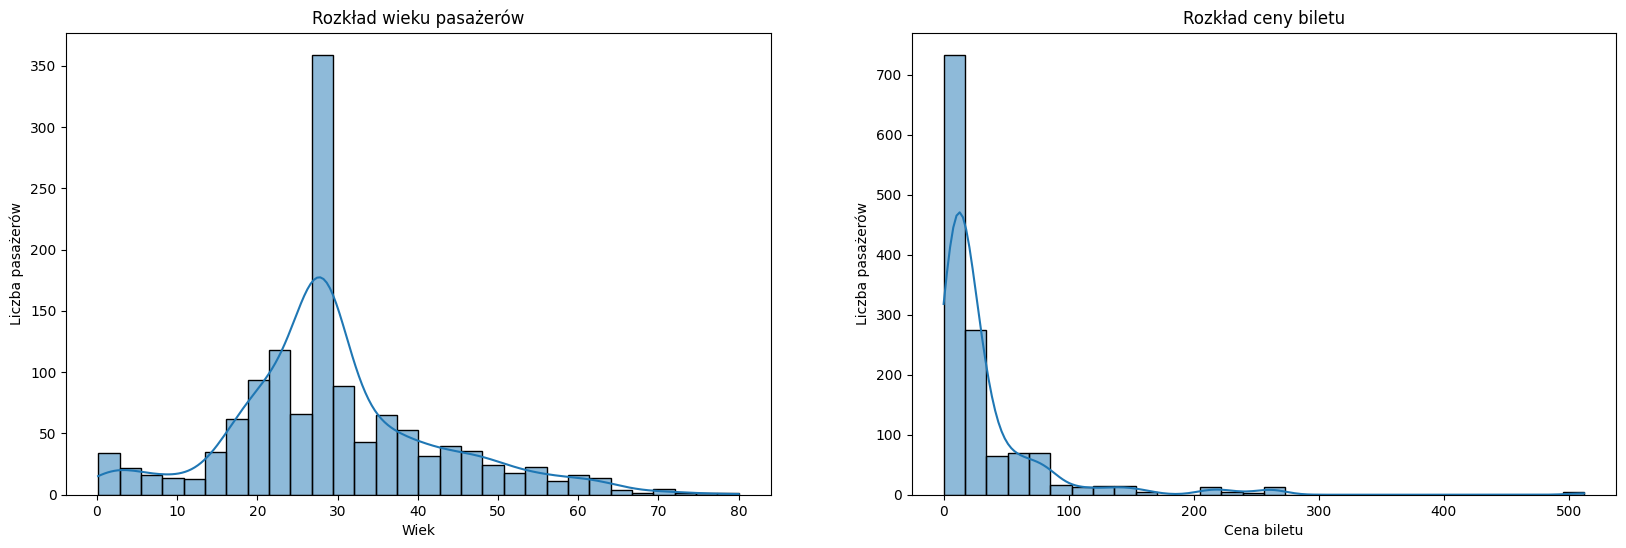

In [71]:
# Utworzenie wykresu
plt.figure(figsize=(20, 6))

# Histogram wieku
plt.subplot(1, 2, 1)
sns.histplot(df['age'], bins=30, kde=True)
plt.title('Rozkład wieku pasażerów')
plt.xlabel('Wiek')
plt.ylabel('Liczba pasażerów')

# Histogram ceny biletu
plt.subplot(1, 2, 2)
sns.histplot(df['fare'], bins=30, kde=True)
plt.title('Rozkład ceny biletu')
plt.xlabel('Cena biletu')
plt.ylabel('Liczba pasażerów')

plt.show()

### Podsumowanie:

- Histogram wieku pokazuje, że największa liczba pasażerow byla w wieku młodym do średniej dorosłości, z wyraźnym pikiem około 28 lat.
- Histogram cen biletów pokazuje, że większość biletów kosztowała poniżej 50 jednostek walutowych. Występuje kilka wartości znacznie przekraczających 200 jednostek walutowych.

**Uwaga:** Wyrażny pik na histogramie wieku w okolicach 28 roku życia, spowodowany jest zastąpieniem brakujących 264 wartości wieku w danych medianą o tej wartości. Mimo to nie przeszkadza to w sformułowaniu wniosku, że największa liczba pasażerów była w wieku młodym do średniej dorosłości (około 20-35 lat). Problem ten nie występuje przy analizie cen biletów- zastąpiono tylko dwie brakujące wartości.

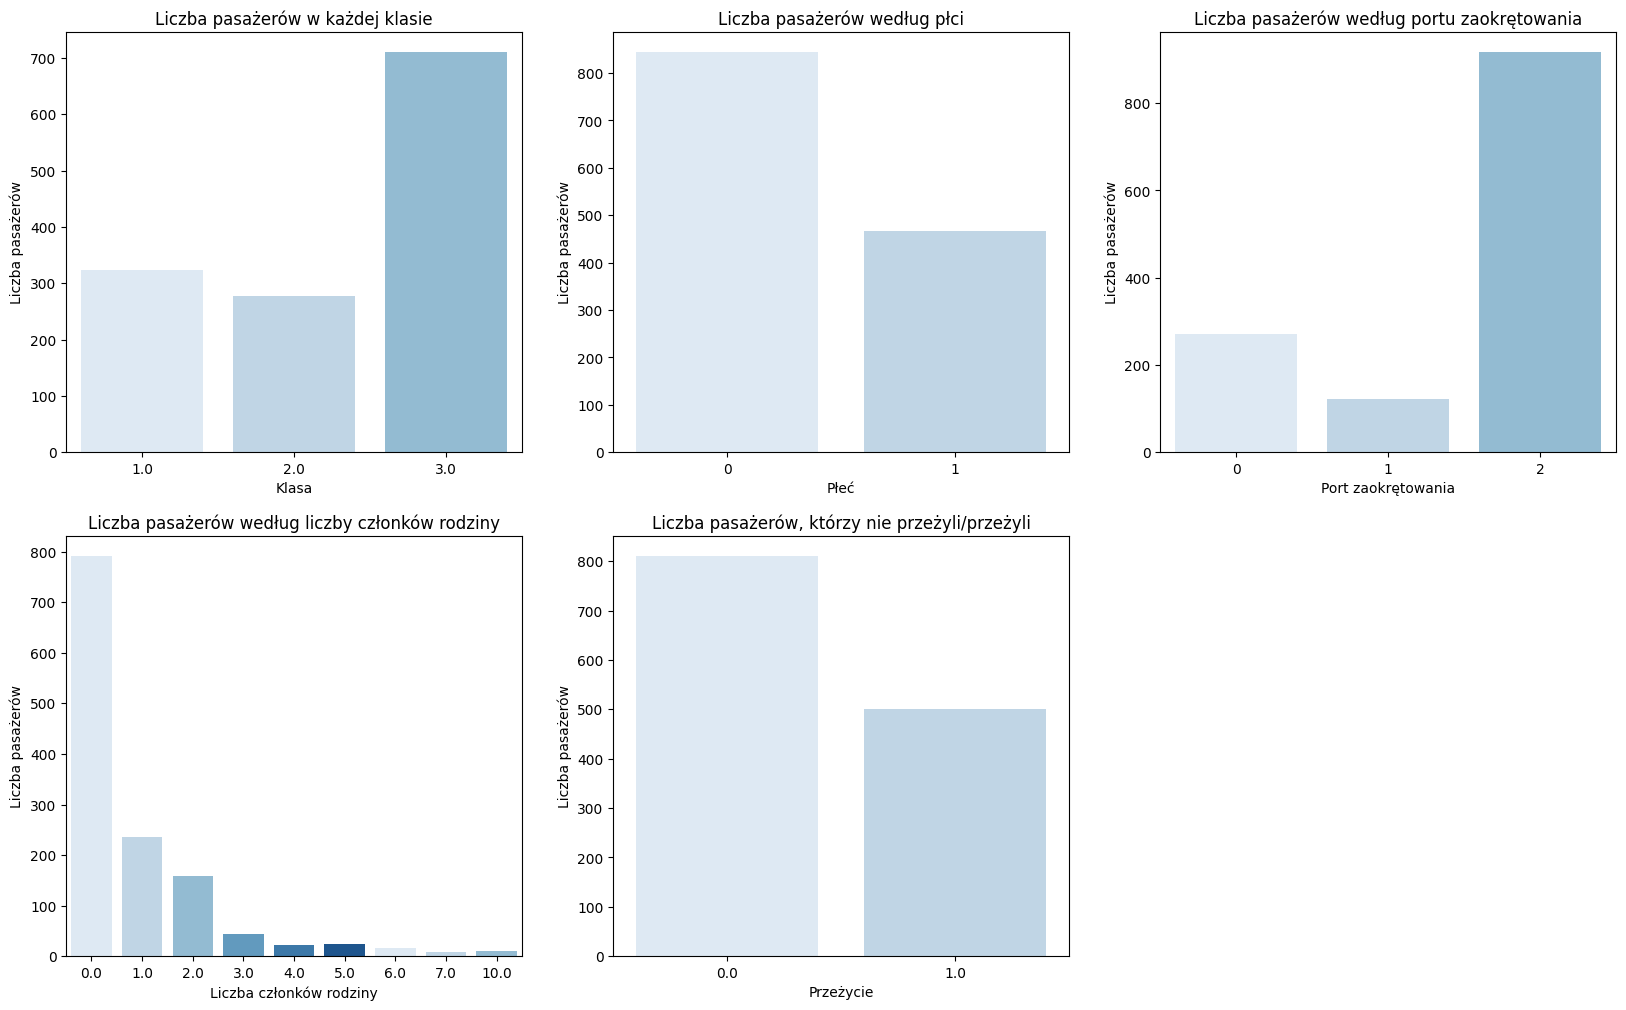

In [72]:
# Ustalenie palety kolorów
palette = sns.color_palette("Blues", 6)

# Utworzenie wykresów
plt.figure(figsize=(20, 12))

# Countplot klasy
plt.subplot(2, 3, 1)
sns.countplot(data=df, x='pclass', palette=palette)
plt.title('Liczba pasażerów w każdej klasie')
plt.xlabel('Klasa')
plt.ylabel('Liczba pasażerów')

# Countplot płci
plt.subplot(2, 3, 2)
sns.countplot(data=df, x='sex', palette=palette)
plt.title('Liczba pasażerów według płci')
plt.xlabel('Płeć')
plt.ylabel('Liczba pasażerów')

# Countplot portu zaokrętowania
plt.subplot(2, 3, 3)
sns.countplot(data=df, x='embarked', palette=palette)
plt.title('Liczba pasażerów według portu zaokrętowania')
plt.xlabel('Port zaokrętowania')
plt.ylabel('Liczba pasażerów')

# Countplot liczby członków rodziny
plt.subplot(2, 3, 4)
sns.countplot(data=df, x='family_size', palette=palette)
plt.title('Liczba pasażerów według liczby członków rodziny')
plt.xlabel('Liczba członków rodziny')
plt.ylabel('Liczba pasażerów')

# Countplot przeżywalności
plt.subplot(2, 3, 5)
sns.countplot(data=df, x='survived', palette=palette)
plt.title('Liczba pasażerów, którzy nie przeżyli/przeżyli')
plt.xlabel('Przeżycie')
plt.ylabel('Liczba pasażerów')

plt.show()

### Podsumowanie:

- Najwięcej pasażerów podróżowało w trzeciej klasie, następnie w pierwszej, a najmniej w drugiej.
- Więcej pasażerów było płci męskiej.
- Najwięcej pasażerów zaokrętowało w Southampton, następnie w Cherbourg, a najmniej w Queenstown.
- Większość pasażerów podróżowała bez bliskich krewnych.
- Większość pasażerów nie przeżyła katastrofy.

## 3. Grupowanie i agregacja danych

Agregacja danych ze względu na klasę:
   pclass  wiek_mean   wiek_std  plec_mean  plec_std  \
0     1.0  37.812436  14.116481   0.445820  0.497827   
1     2.0  29.419675  13.242086   0.382671  0.486919   
2     3.0  25.753521  10.146602   0.304225  0.460403   

   liczba_czlonkow_rodziny_mean  liczba_czlonkow_rodziny_std  \
0                      0.801858                     1.062224   
1                      0.761733                     1.029060   
2                      0.967606                     1.920219   

   cena_biletu_mean  cena_biletu_std  port_mean  port_std  przezycie_mean  \
0         87.508992        80.447178   1.117647  0.989902        0.619195   
1         21.179196        13.607122   1.772563  0.615828        0.429603   
2         13.306132        11.478297   1.556338  0.729440        0.254930   

   przezycie_std  
0       0.486338  
1       0.495915  
2       0.436129  


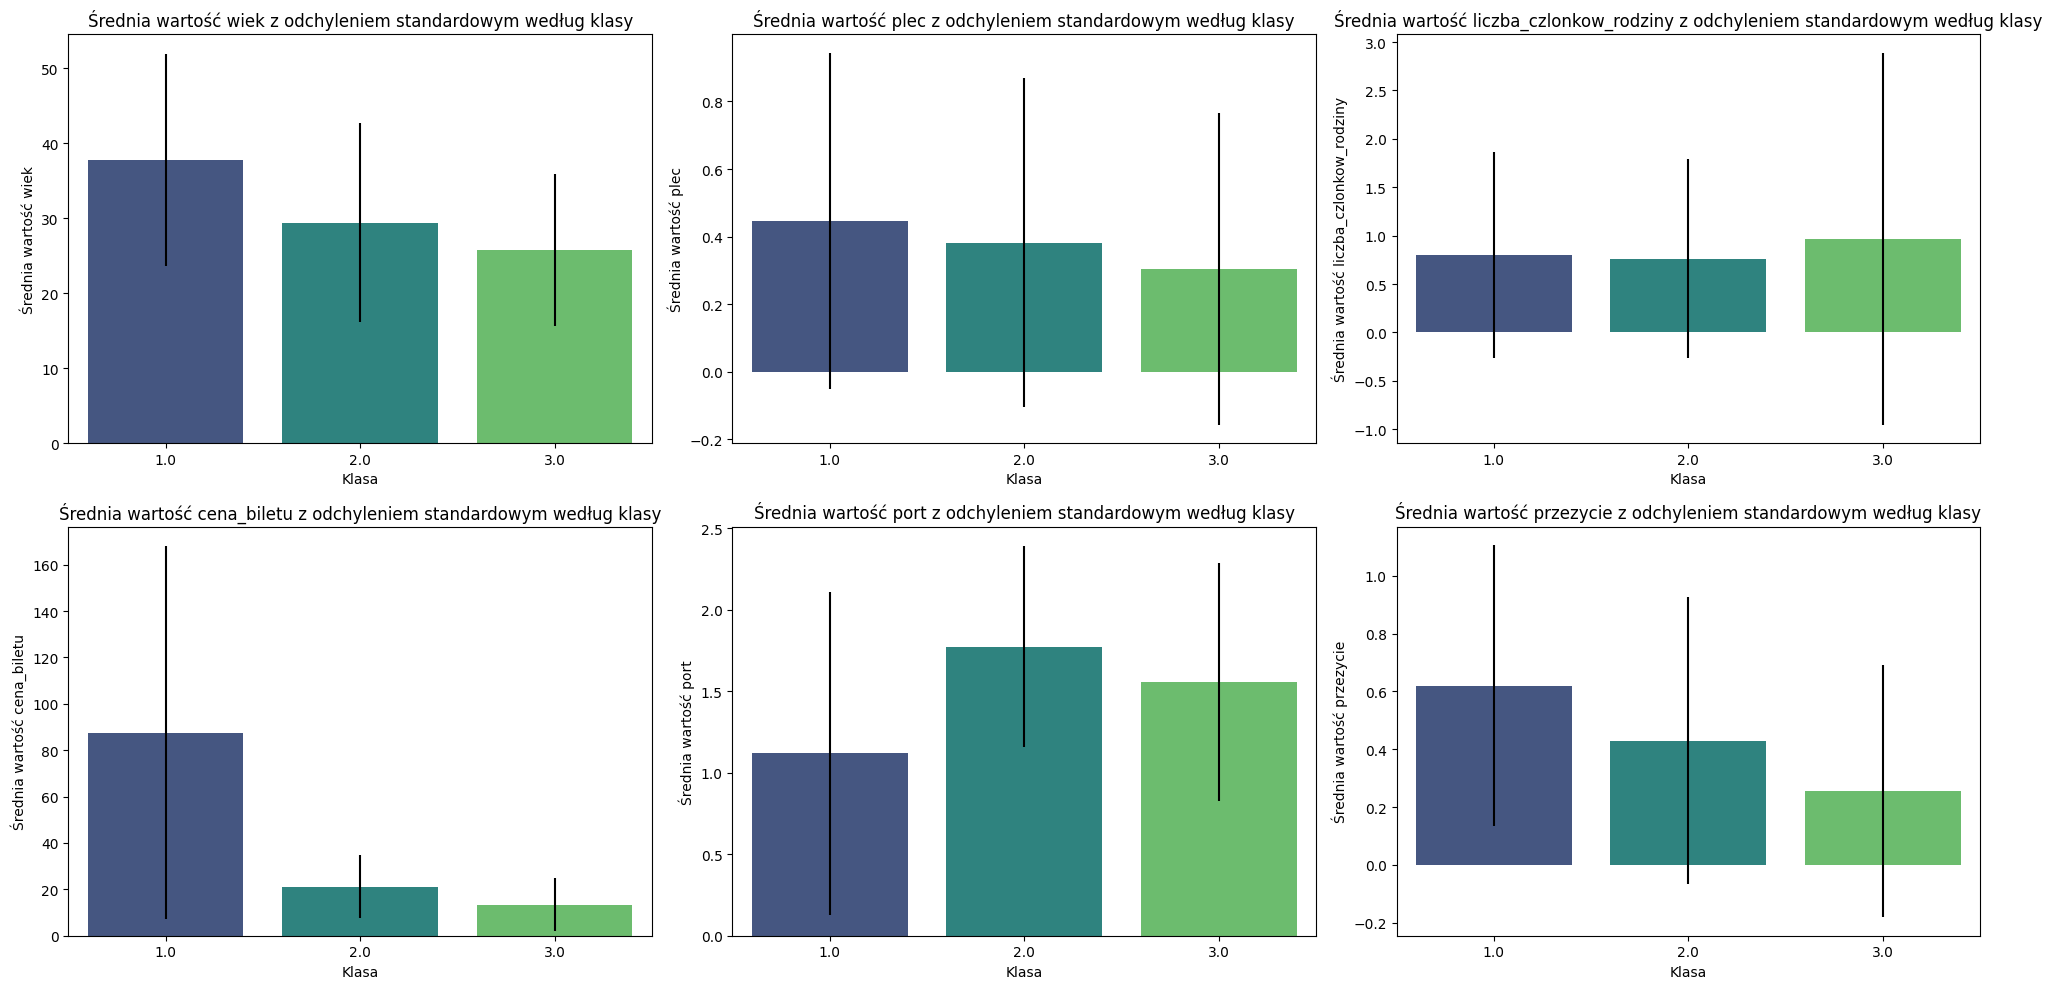

In [73]:
# Funkcja do agregacji
def aggregate_by_class(df):
    # Grupowanie przez `pclass`
    aggregated_data = df.groupby('pclass').agg({
        'age': ['mean', 'std'],
        'sex': ['mean', 'std'],
        'family_size': ['mean', 'std'],
        'fare': ['mean', 'std'],
        'embarked': ['mean', 'std'],
        'survived': ['mean', 'std']
    }).reset_index()

    # Zmiana nazw kolumn
    aggregated_data.columns = ['pclass', 'wiek_mean', 'wiek_std', 'plec_mean', 'plec_std',
                               'liczba_czlonkow_rodziny_mean', 'liczba_czlonkow_rodziny_std',
                               'cena_biletu_mean', 'cena_biletu_std',
                               'port_mean', 'port_std', 'przezycie_mean', 'przezycie_std']
    return aggregated_data

# Agregacja danych
aggregated_data = aggregate_by_class(df)

# Wyświetlenie wyników agregacji
print("Agregacja danych ze względu na klasę:")
print(aggregated_data)

# Lista cech do analizy
features = ['wiek', 'plec', 'liczba_czlonkow_rodziny', 'cena_biletu', 'port', 'przezycie']

# Liczba wierszy i kolumn dla wykresów
n_cols = 3
n_rows = int(np.ceil(len(features) / n_cols))

# Tworzenie wykresów średnich wartości z odchyleniami standardowymi
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

for i, feature in enumerate(features):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.barplot(data=aggregated_data, x='pclass', y=f'{feature}_mean',
                yerr=aggregated_data[f'{feature}_std'], ax=ax, palette='viridis')
    ax.set_title(f'Średnia wartość {feature} z odchyleniem standardowym według klasy')
    ax.set_xlabel('Klasa')
    ax.set_ylabel(f'Średnia wartość {feature}')
    ax.grid(False)  # Usunięcie siatki

# Usuwanie pustych wykresów
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Ustawienie odstępów między wykresami
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()

### Podsumowanie:

- **Średnia wartość wieku**- wiek pasażerów klasy 1 jest wyraźnie wyższy w porównaniu do pasażerów klasy 2 i 3. Odchylenie standardowe jest największe w klasie 1, co sugeruje większą różnorodność wiekową pasażerów tej klasy.
- **Średnia wartość płci**- proporcje płci (zakodowane jako 0 dla mężczyzn i 1 dla kobiet) są dość podobne we wszystkich klasach, ale w klasie 1 jest nieco wyższy udział kobiet. Odchylenie standardowe jest duże we wszystkich klasach, co sugeruje znaczne zróżnicowanie płciowe w każdej z klas.
- **Średnia wartość liczby członków rodziny**- liczba członków rodziny jest stosunkowo niska we wszystkich klasach, z niewielką różnicą między klasami. Odchylenie standardowe jest duże, co wskazuje na dużą zmienność w liczbie członków rodziny w każdej z klas.
- **Średnia wartość ceny biletu**- ceny biletów są najwyższe w klasie 1 i znacząco niższe w klasach 2 i 3. Odchylenie standardowe ceny biletu jest największe w klasie 1, co sugeruje dużą różnorodność cen biletów w tej klasie.
- **Średnia wartość portu** - porty zaokrętowania są różnie reprezentowane w klasach, ale średnie wartości wskazują na pewną różnorodność między klasami. Odchylenie standardowe jest znaczące, co wskazuje na dużą zmienność w portach zaokrętowania w każdej z klas.
- **Średnia wartość przeżycia**- pasażerowie klasy 1 mają najwyższą średnią wartość przeżycia, podczas gdy pasażerowie klasy 3 mają najniższą. Odchylenie standardowe jest znaczne, co wskazuje na różnorodność w wynikach przeżycia w każdej z klas.

Agregacja danych ze względu na płeć:
   plec  wiek_mean   wiek_std  liczba_czlonkow_rodziny_mean  \
0     0  30.015502  12.652592                      0.661137   
1     1  28.572067  13.300806                      1.285408   

   liczba_czlonkow_rodziny_std  cena_biletu_mean  cena_biletu_std  port_mean  \
0                     1.456806         26.126875        42.440265   1.553318   
1                     1.719615         46.198097        63.292599   1.386266   

   port_std  przezycie_mean  przezycie_std  
0  0.787356        0.190758       0.393132  
1  0.850644        0.727468       0.445741  


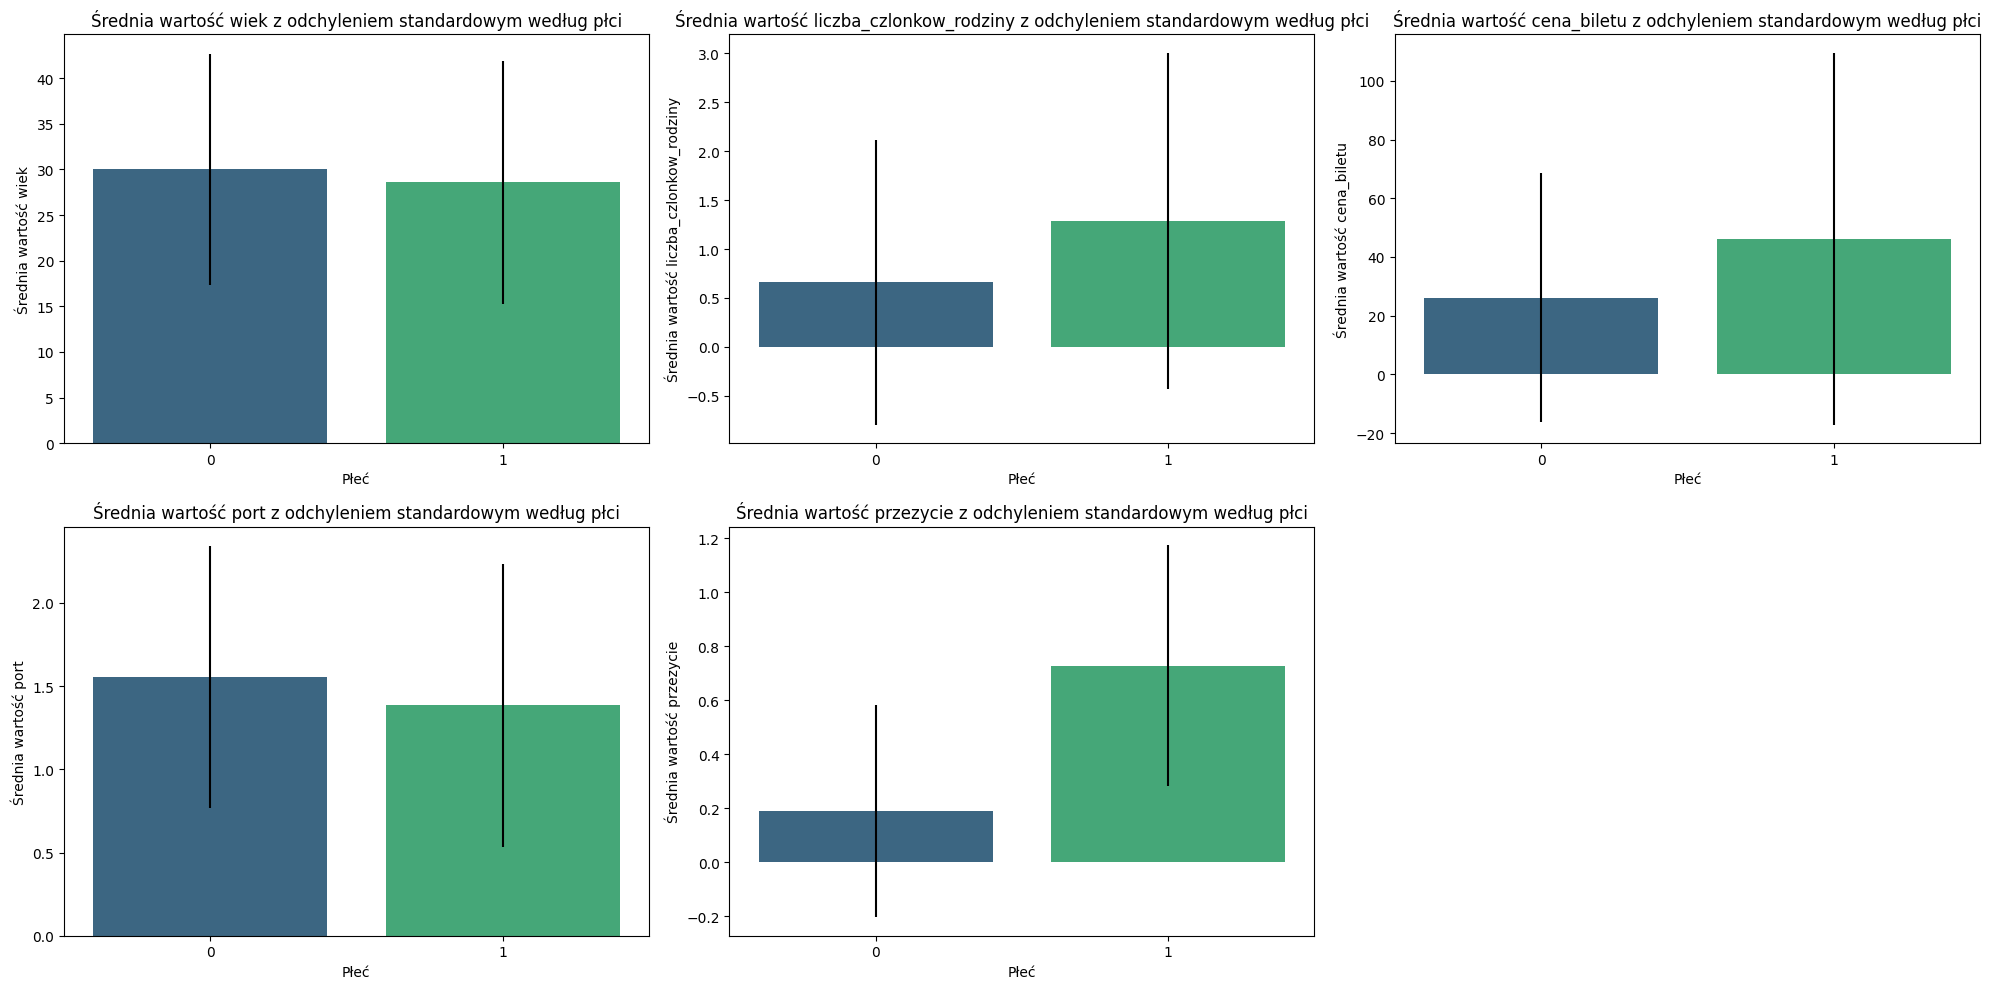

In [74]:
# Funkcja do agregacji
def aggregate_by_sex(df):
    # Grupowanie przez `sex`
    aggregated_data = df.groupby('sex').agg({
        'age': ['mean', 'std'],
        'family_size': ['mean', 'std'],
        'fare': ['mean', 'std'],
        'embarked': ['mean', 'std'],
        'survived': ['mean', 'std']
    }).reset_index()

    # Zmiana nazw kolumn
    aggregated_data.columns = ['plec', 'wiek_mean', 'wiek_std', 'liczba_czlonkow_rodziny_mean', 'liczba_czlonkow_rodziny_std',
                               'cena_biletu_mean', 'cena_biletu_std', 'port_mean', 'port_std',
                               'przezycie_mean', 'przezycie_std']
    return aggregated_data

# Agregacja danych
aggregated_data_sex = aggregate_by_sex(df)

# Wyświetlenie wyników agregacji
print("Agregacja danych ze względu na płeć:")
print(aggregated_data_sex)

# Lista cech do analizy
features_sex = ['wiek', 'liczba_czlonkow_rodziny', 'cena_biletu', 'port', 'przezycie']

# Liczba wierszy i kolumn dla wykresów
n_cols = 3
n_rows = int(np.ceil(len(features_sex) / n_cols))

# Tworzenie wykresów średnich wartości z odchyleniami standardowymi
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

for i, feature in enumerate(features_sex):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.barplot(data=aggregated_data_sex, x='plec', y=f'{feature}_mean',
                yerr=aggregated_data_sex[f'{feature}_std'], ax=ax, palette='viridis')
    ax.set_title(f'Średnia wartość {feature} z odchyleniem standardowym według płci')
    ax.set_xlabel('Płeć')
    ax.set_ylabel(f'Średnia wartość {feature}')
    ax.grid(False)  # Usunięcie siatki

# Usuwanie pustych wykresów
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Ustawienie odstępów między wykresami
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()

## Podsumowanie:

- **Średnia wartość wieku**- średnia wieku mężczyzn (0) i kobiet (1) jest bardzo podobna. Odchylenie standardowe jest duże, co sugeruje znaczną różnorodność wiekową zarówno wśród mężczyzn, jak i kobiet.
- **Średnia wartość liczby członków rodziny**- średnia liczba członków rodziny jest wyższa wśród kobiet niż mężczyzn. Odchylenie standardowe jest również większe wśród kobiet, co wskazuje na większą zmienność w liczbie członków rodziny wśród kobiet.
- **Średnia wartość ceny biletu**- kobiety miały średnio wyższą cenę biletu niż mężczyźni. Odchylenie standardowe ceny biletu jest większe wśród kobiet, co sugeruje większą różnorodność cen biletów w tej grupie.
- **Średnia wartość portu**- port zaokrętowania jest podobny dla obu płci, co wskazuje na brak znaczącej różnicy w średnim porcie zaokrętowania między mężczyznami a kobietami. Odchylenie standardowe jest duże, co wskazuje na znaczną zmienność w porcie zaokrętowania w obu grupach.
- **Średnia wartość przeżycia**- średnia wartość przeżycia jest znacznie wyższa wśród kobiet niż mężczyzn. Odchylenie standardowe jest większe wśród kobiet, co wskazuje na różnorodność wyników przeżycia w tej grupie.

Agregacja danych ze względu na przeżycie:
   przezycie  wiek_mean   wiek_std  liczba_czlonkow_rodziny_mean  \
0        0.0  29.945165  12.216475                      0.849383   
1        1.0  28.784167  13.920034                      0.938000   

   liczba_czlonkow_rodziny_std  cena_biletu_mean  cena_biletu_std  port_mean  \
0                     1.791901         23.331856        34.105727   1.606173   
1                     1.168283         49.361184        68.648795   1.312000   

   port_std  
0  0.731905  
1  0.903487  


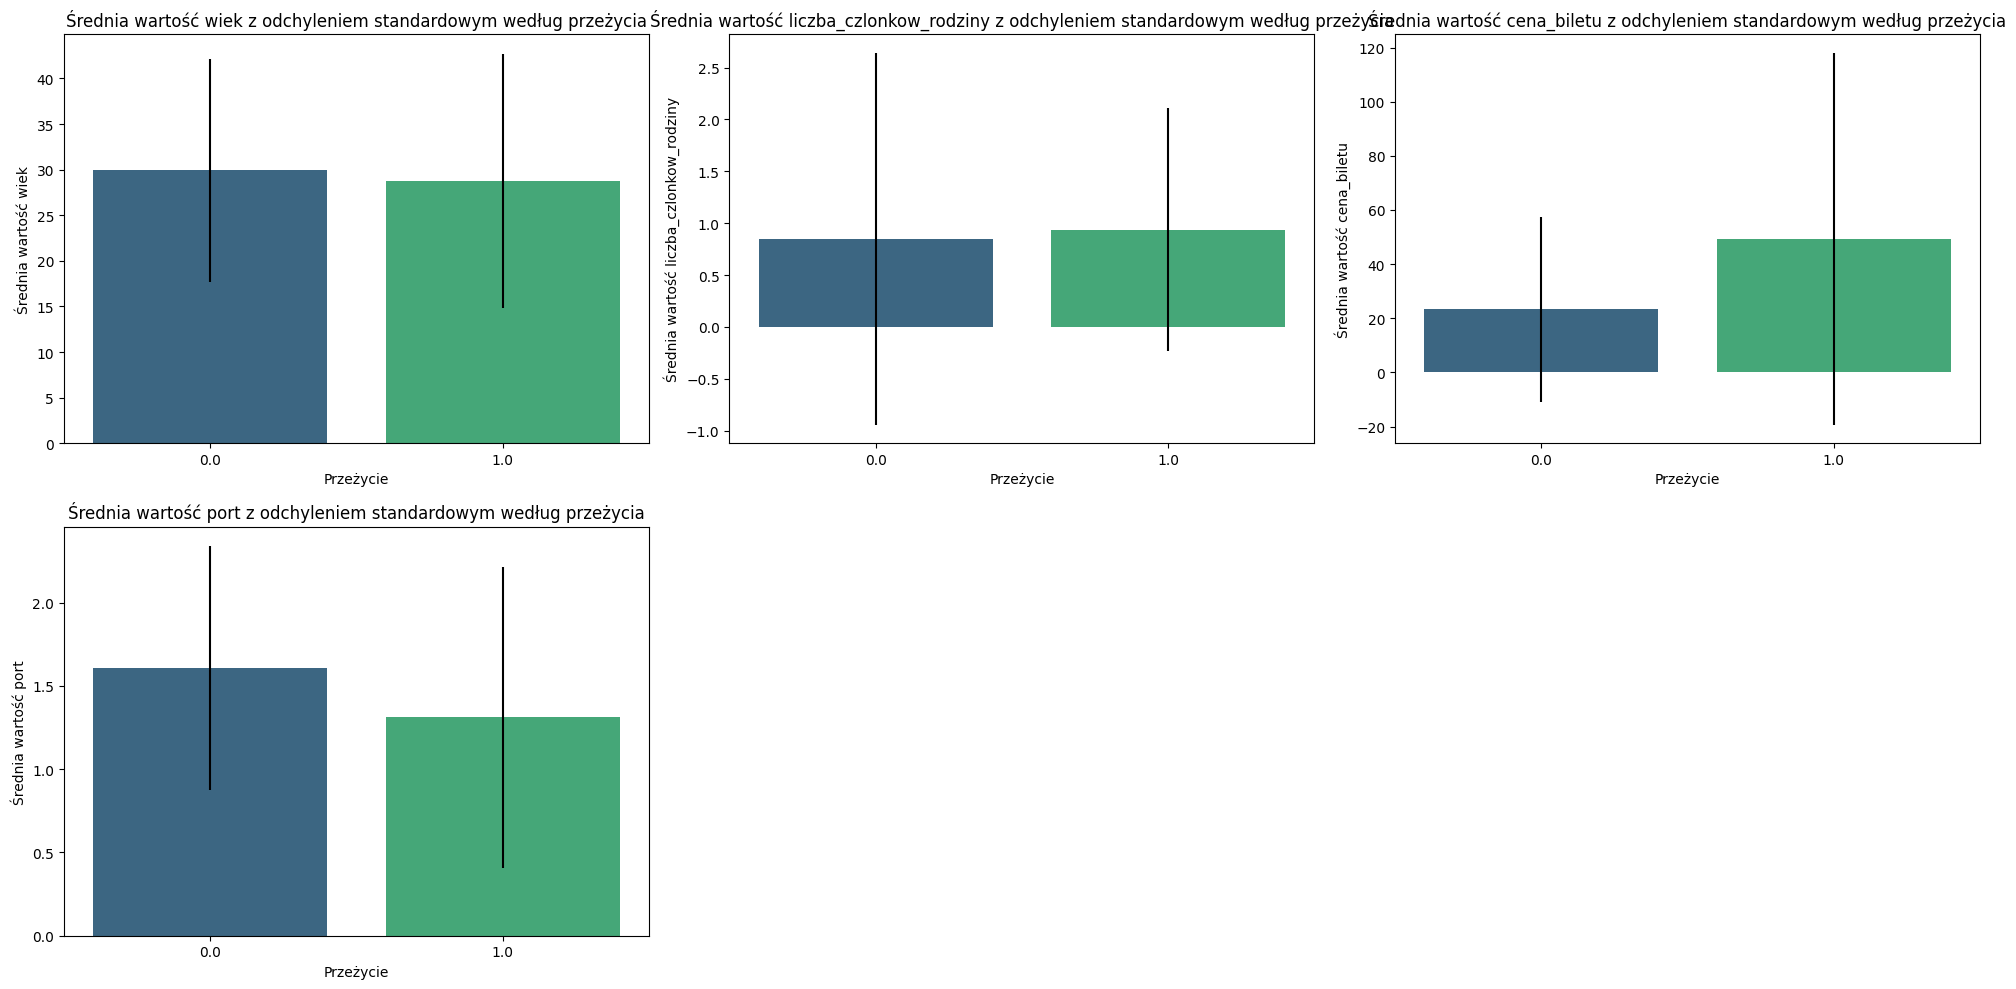

In [75]:
# Funkcja do agregacji
def aggregate_by_survived(df):
    # Grupowanie przez `survived`
    aggregated_data = df.groupby('survived').agg({
        'age': ['mean', 'std'],
        'family_size': ['mean', 'std'],
        'fare': ['mean', 'std'],
        'embarked': ['mean', 'std']
    }).reset_index()

    # Zmiana nazw kolumn
    aggregated_data.columns = ['przezycie', 'wiek_mean', 'wiek_std',
                               'liczba_czlonkow_rodziny_mean', 'liczba_czlonkow_rodziny_std',
                               'cena_biletu_mean', 'cena_biletu_std',
                               'port_mean', 'port_std']
    return aggregated_data

# Agregacja danych
aggregated_data_survived = aggregate_by_survived(df)

# Wyświetlenie wyników agregacji
print("Agregacja danych ze względu na przeżycie:")
print(aggregated_data_survived)

# Lista cech do analizy
features_survived = ['wiek', 'liczba_czlonkow_rodziny', 'cena_biletu', 'port']

# Liczba wierszy i kolumn dla wykresów
n_cols = 3
n_rows = int(np.ceil(len(features_survived) / n_cols))

# Tworzenie wykresów średnich wartości z odchyleniami standardowymi
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

for i, feature in enumerate(features_survived):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.barplot(data=aggregated_data_survived, x='przezycie', y=f'{feature}_mean',
                yerr=aggregated_data_survived[f'{feature}_std'], ax=ax, palette='viridis')
    ax.set_title(f'Średnia wartość {feature} z odchyleniem standardowym według przeżycia')
    ax.set_xlabel('Przeżycie')
    ax.set_ylabel(f'Średnia wartość {feature}')
    ax.grid(False)  # Usunięcie siatki

# Usuwanie pustych wykresów
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Ustawienie odstępów między wykresami
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()

## Podsumowanie:

- **Średnia wartość wieku**- średnia wieku osób, które przeżyły (1), jest zbliżona do średniej wieku osób, które nie przeżyły (0). Odchylenie standardowe jest duże, co wskazuje na znaczną różnorodność wiekową w obu grupach.
- **Średnia wartość liczby członków rodziny**- średnia liczba członków rodziny jest nieznacznie wyższa wśród osób, które przeżyły, niż wśród tych, które nie przeżyły. Odchylenie standardowe jest znaczne w obu grupach, co wskazuje na dużą zmienność liczby członków rodziny.
- **Średnia wartość ceny biletu**- osoby, które przeżyły, miały średnio wyższą cenę biletu niż osoby, które nie przeżyły. Odchylenie standardowe ceny biletu jest większe wśród osób, które przeżyły, co sugeruje większą różnorodność cen biletów w tej grupie.
- **Średnia wartość portu**- port zaokrętowania jest podobny dla obu grup, co wskazuje na brak znaczącej różnicy w średnim porcie zaokrętowania między osobami, które przeżyły, a tymi, które nie przeżyły. Odchylenie standardowe jest duże w obu grupach, co wskazuje na znaczną zmienność w porcie zaokrętowania.

Agregacja danych ze względu na port zaokrętowania:
   port  wiek_mean   wiek_std  liczba_czlonkow_rodziny_mean  \
0     0  31.401543  13.630504                      0.770370   
1     1  28.256098   9.540330                      0.455285   
2     2  29.109869  13.027331                      0.973828   

   liczba_czlonkow_rodziny_std  cena_biletu_mean  cena_biletu_std  
0                     0.944093         62.336267        84.185996  
1                     1.161204         12.409012        13.616133  
2                     1.761851         27.505229        37.101615  


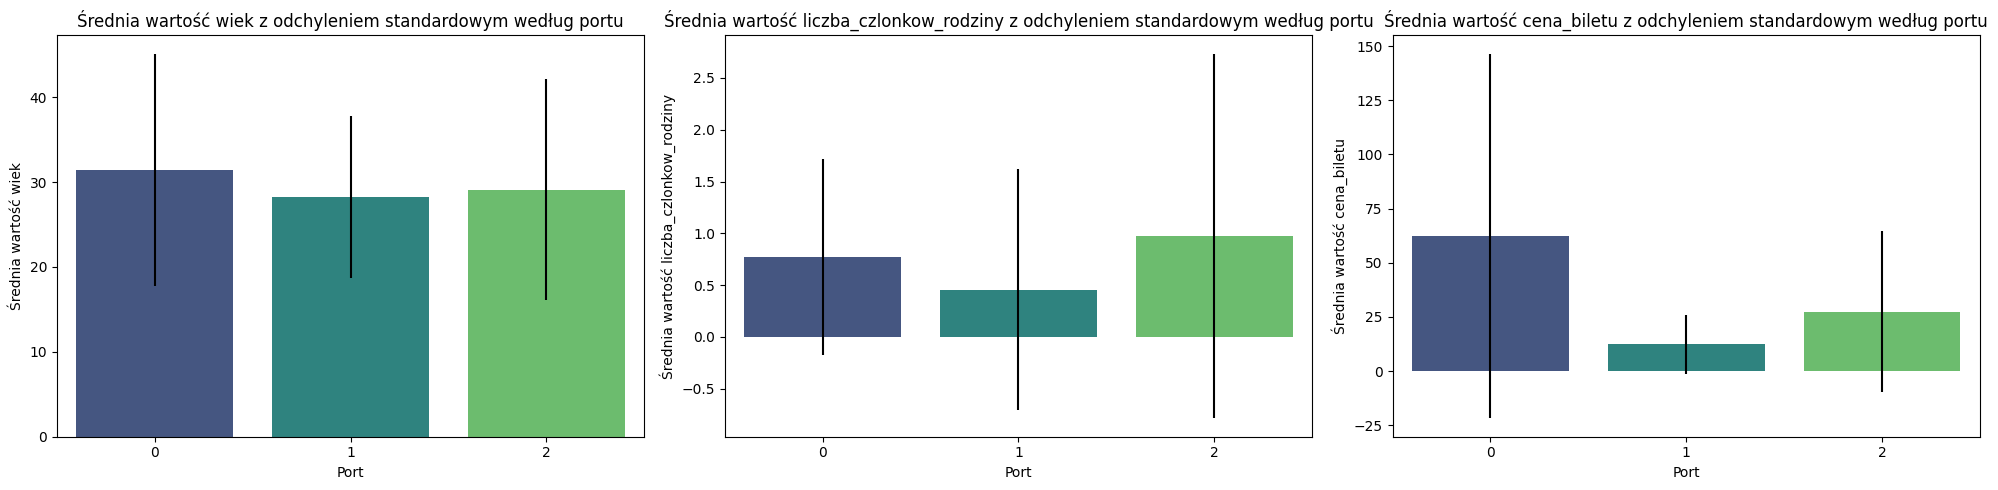

In [76]:
# Funkcja do agregacji
def aggregate_by_embarked(df):
    # Grupowanie przez `embarked`
    aggregated_data = df.groupby('embarked').agg({
        'age': ['mean', 'std'],
        'family_size': ['mean', 'std'],
        'fare': ['mean', 'std']
    }).reset_index()

    # Zmiana nazw kolumn
    aggregated_data.columns = ['port', 'wiek_mean', 'wiek_std',
                               'liczba_czlonkow_rodziny_mean', 'liczba_czlonkow_rodziny_std',
                               'cena_biletu_mean', 'cena_biletu_std']
    return aggregated_data

# Agregacja danych
aggregated_data_embarked = aggregate_by_embarked(df)

# Wyświetlenie wyników agregacji
print("Agregacja danych ze względu na port zaokrętowania:")
print(aggregated_data_embarked)

# Lista cech do analizy
features_embarked = ['wiek', 'liczba_czlonkow_rodziny', 'cena_biletu']

# Liczba wierszy i kolumn dla wykresów
n_cols = 3
n_rows = int(np.ceil(len(features_embarked) / n_cols))

# Tworzenie wykresów średnich wartości z odchyleniami standardowymi
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Jeśli mamy tylko jeden wiersz, `axes` będzie jednowymiarowe
if n_rows == 1:
    axes = np.expand_dims(axes, axis=0)

for i, feature in enumerate(features_embarked):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.barplot(data=aggregated_data_embarked, x='port', y=f'{feature}_mean',
                yerr=aggregated_data_embarked[f'{feature}_std'].values, ax=ax, palette='viridis')
    ax.set_title(f'Średnia wartość {feature} z odchyleniem standardowym według portu')
    ax.set_xlabel('Port')
    ax.set_ylabel(f'Średnia wartość {feature}')
    ax.grid(False)  # Usunięcie siatki

# Usuwanie pustych wykresów
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Ustawienie odstępów między wykresami
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()


## Podsumowanie:

- **Średnia wartość wieku**- osoby zaokrętowane w porcie Cherbourg mają nieco wyższą średnią wieku niż osoby zaokrętowane w portach Queenstown i Southampton. Odchylenie standardowe jest największe w porcie Cherbourg, co wskazuje na większą różnorodność wiekową pasażerów zaokrętowanych w tym porcie.
- **Średnia wartość liczby członków rodziny**- średnia liczba członków rodziny jest najwyższa dla osób zaokrętowanych w porcie Southampton, natomiast najniższa dla portu Queenstown. Odchylenie standardowe jest znaczące we wszystkich portach, co sugeruje dużą zmienność liczby członków rodziny niezależnie od portu zaokrętowania.
- **Średnia wartość ceny biletu**- osoby zaokrętowane w porcie Cherbourg miały średnio najwyższą cenę biletu, podczas gdy osoby zaokrętowane w porcie Queenstown miały najniższą średnią cenę biletu. Odchylenie standardowe ceny biletu jest największe w porcie Cherbourg, co sugeruje dużą różnorodność cen biletów wśród pasażerów zaokrętowanych w tym porcie.

Agregacja danych ze względu na liczbę członków rodziny:
   family_size  wiek_mean   wiek_std  cena_biletu_mean  cena_biletu_std
0          0.0  30.619469  10.687977         21.741707        41.405247
1          1.0  32.143617  13.437696         51.228106        63.497471
2          2.0  26.672431  16.708730         41.566062        44.996721
3          3.0  20.220933  14.132646         51.186047        43.718696
4          4.0  24.727273  16.248610         80.067432       101.313185
5          5.0  20.120000  18.448848         87.081000       101.036027
6          6.0  17.375000  15.396428         28.396094         8.020605
7          7.0  18.000000  15.175168         46.900000         0.000000
8         10.0  26.772727   4.070403         69.550000         0.000000


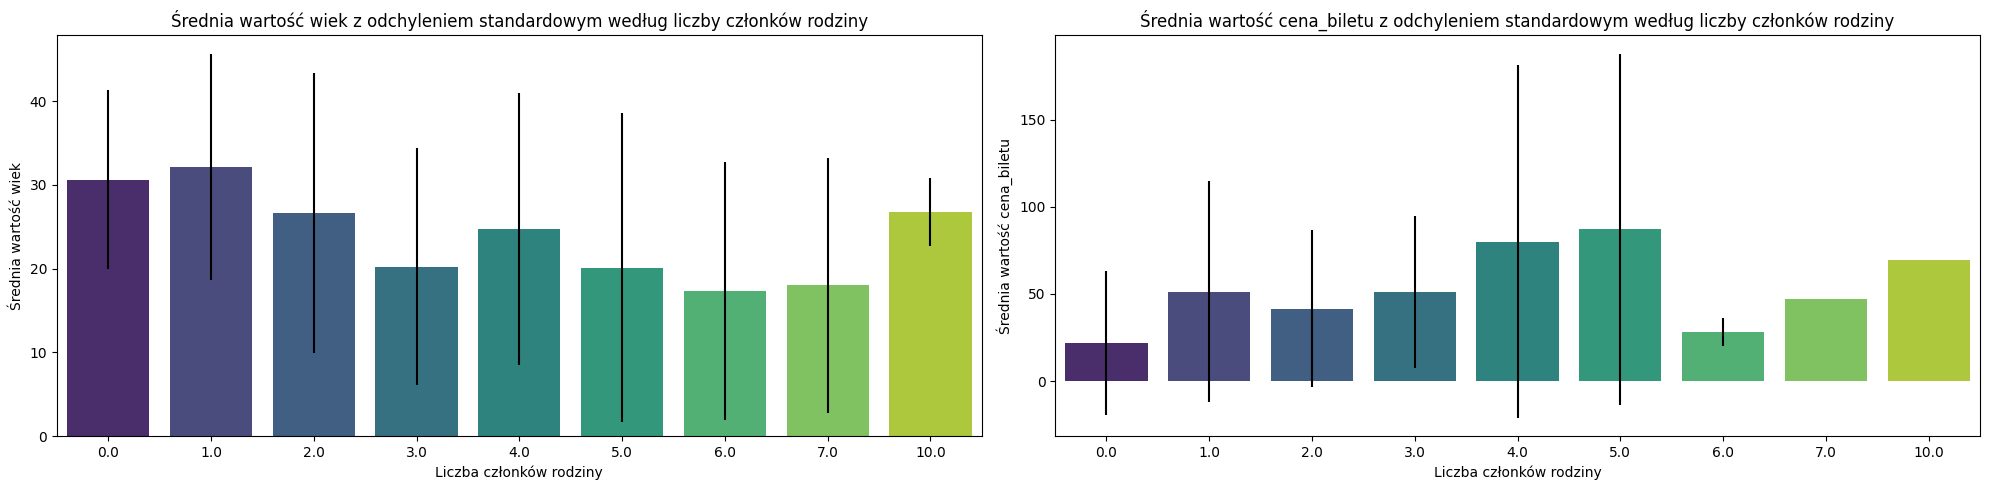

In [77]:
# Funkcja do agregacji
def aggregate_by_family_size(df):
    # Grupowanie przez `family_size`
    aggregated_data = df.groupby('family_size').agg({
        'age': ['mean', 'std'],
        'fare': ['mean', 'std']
    }).reset_index()

    # Zmiana nazw kolumn
    aggregated_data.columns = ['family_size', 'wiek_mean', 'wiek_std',
                               'cena_biletu_mean', 'cena_biletu_std']
    return aggregated_data

# Agregacja danych
aggregated_data_family_size = aggregate_by_family_size(df)

# Wyświetlenie wyników agregacji
print("Agregacja danych ze względu na liczbę członków rodziny:")
print(aggregated_data_family_size)

# Lista cech do analizy
features_family_size = ['wiek', 'cena_biletu']

# Liczba wierszy i kolumn dla wykresów
n_cols = 2
n_rows = int(np.ceil(len(features_family_size) / n_cols))

# Tworzenie wykresów średnich wartości z odchyleniami standardowymi
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Jeśli mamy tylko jeden wiersz, `axes` będzie jednowymiarowe
if n_rows == 1:
    axes = np.expand_dims(axes, axis=0)

for i, feature in enumerate(features_family_size):
    row = i // n_cols
    col = i % n_cols
    ax = axes[row, col]
    sns.barplot(data=aggregated_data_family_size, x='family_size', y=f'{feature}_mean',
                yerr=aggregated_data_family_size[f'{feature}_std'].values, ax=ax, palette='viridis')
    ax.set_title(f'Średnia wartość {feature} z odchyleniem standardowym według liczby członków rodziny')
    ax.set_xlabel('Liczba członków rodziny')
    ax.set_ylabel(f'Średnia wartość {feature}')
    ax.grid(False)  # Usunięcie siatki

# Usuwanie pustych wykresów
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(axes.flatten()[j])

# Ustawienie odstępów między wykresami
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()


## Podsumowanie:

- **Średnia wartość wieku**- pasażerowie podróżujący samotnie (liczba członków rodziny = 0) mają średnią wartość wieku około 30 lat. Wiek pasażerów z 1-2 członkami rodziny jest nieco wyższy, z najwyższą średnią dla pasażerów z 1 członkiem rodziny. Pasażerowie z większą liczbą członków rodziny (od 3 wzwyż) mają tendencję do niższej średniej wartości wieku, co może sugerować obecność większej liczby dzieci w tych grupach. Największe odchylenie standardowe występuje dla pasażerów z 1 członkiem rodziny, co oznacza dużą różnorodność wiekową w tej grupie.
- **Średnia wartość ceny biletu**- pasażerowie podróżujący samotnie zapłacili średnio najniższą cenę za bilet. Cena biletu rośnie wraz ze wzrostem liczby członków rodziny, osiągając najwyższą średnią wartość dla pasażerów z 4 i 5 członkami rodziny. Pasażerowie z 6-7 członkami rodziny płacili średnio mniej, co może wynikać z zakupu tańszych biletów grupowych. Odchylenie standardowe ceny biletu jest największe dla pasażerów z 4 i 5 członkami rodziny, co wskazuje na dużą różnorodność w cenach biletów w tych grupach.

Agregacja danych ze względu na przedziały wiekowe:
   wiek_bin  cena_biletu_mean  cena_biletu_std
0   (0, 10]         29.436044        25.088494
1  (10, 20]         28.807050        45.942597
2  (20, 30]         24.629425        38.029729
3  (30, 40]         42.701507        72.449334
4  (40, 50]         47.254231        56.579850
5  (50, 60]         61.943347        75.476675
6  (60, 70]         64.217285        79.973713
7  (70, 80]         34.755567        26.987844


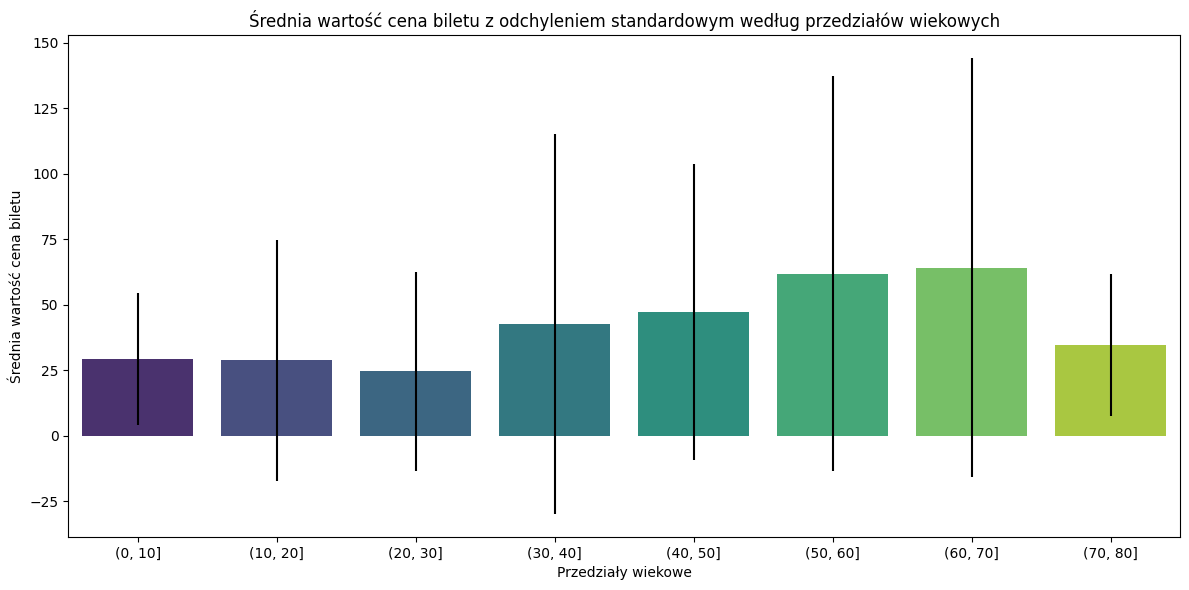

In [78]:
# Funkcja do agregacji z binowaniem wieku
def aggregate_by_age_bins(df, bins):
    # Binowanie wieku
    df['age_bin'] = pd.cut(df['age'], bins=bins)

    # Grupowanie przez biny wiekowe
    aggregated_data = df.groupby('age_bin').agg({
        'fare': ['mean', 'std']
    }).reset_index()

    # Zmiana nazw kolumn
    aggregated_data.columns = ['wiek_bin', 'cena_biletu_mean', 'cena_biletu_std']
    return aggregated_data

# Określenie przedziałów wiekowych
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]

# Agregacja danych
aggregated_data_age_bins = aggregate_by_age_bins(df, age_bins)

# Wyświetlenie wyników agregacji
print("Agregacja danych ze względu na przedziały wiekowe:")
print(aggregated_data_age_bins)

# Tworzenie wykresów średnich wartości z odchyleniami standardowymi dla przedziałów wiekowych
fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(data=aggregated_data_age_bins, x='wiek_bin', y='cena_biletu_mean',
            yerr=aggregated_data_age_bins['cena_biletu_std'].values, ax=ax, palette='viridis')
ax.set_title('Średnia wartość cena biletu z odchyleniem standardowym według przedziałów wiekowych')
ax.set_xlabel('Przedziały wiekowe')
ax.set_ylabel('Średnia wartość cena biletu')
ax.grid(False)  # Usunięcie siatki

# Zapisanie wykresów do pliku
plt.tight_layout()

# Wyświetlenie wykresów
plt.show()

## Podsumowanie:

- Średnia wartość ceny biletu jest stosunkowo stała dla młodszych grup wiekowych (0-20 lat) i wynosi około 25-30 jednostek walutowych. Dla osób w wieku 20-30 lat średnia cena biletu jest niższa, co może sugerować, że osoby w tym wieku wybierały tańsze opcje podróży. Od przedziału wiekowego 30-40 lat, cena biletu zaczyna rosnąć, osiągając najwyższe średnie wartości dla osób w wieku 50-70 lat.
- Najwyższe średnie wartości ceny biletu obserwuje się w przedziałach wiekowych 50-70 lat, co może sugerować, że starsze osoby miały tendencję do wybierania droższych opcji podróży. W przedziale wiekowym 70-80 lat średnia wartość ceny biletu spada, co może być wynikiem mniejszej liczby pasażerów w tym przedziale wiekowym.
- Największe odchylenie standardowe ceny biletu występuje w przedziałach wiekowych 40-50, 50-60 i 60-70 lat. Sugeruje to dużą różnorodność w cenach biletów kupowanych przez osoby w tych grupach wiekowych. Dla najmłodszych grup wiekowych (0-20 lat) oraz najstarszych (70-80 lat), odchylenie standardowe jest mniejsze, co oznacza mniejszą różnorodność cen biletów w tych grupach.

## 4. Podsumowanie analizy zależności między zmiennymi- macierz korelacji

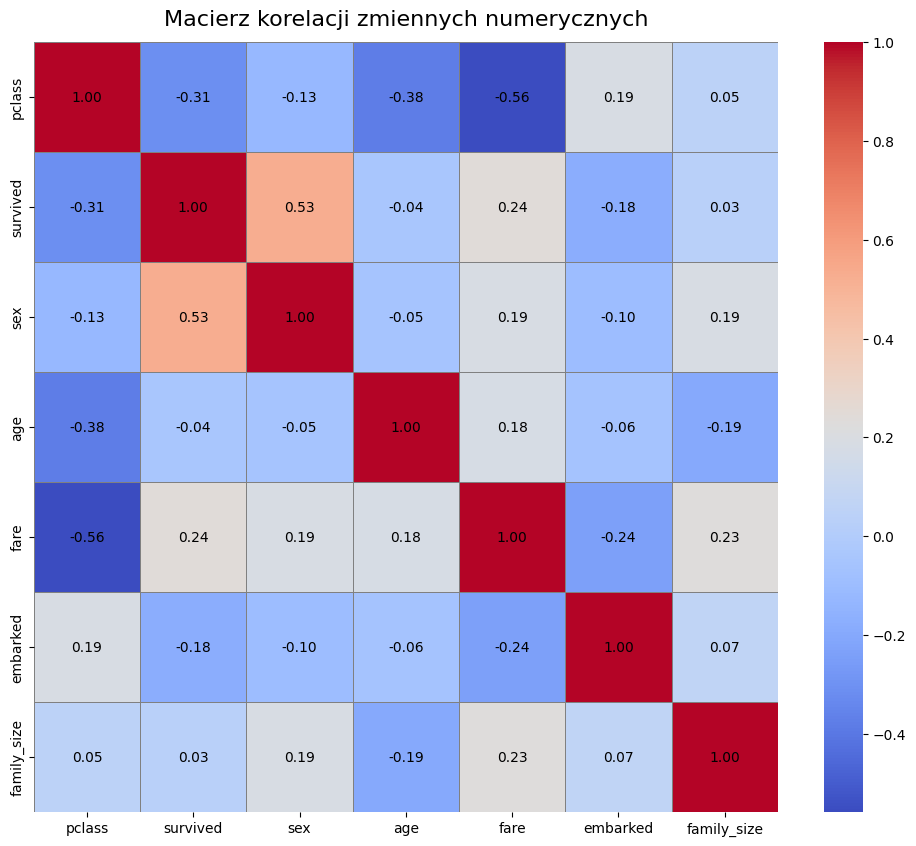

In [79]:
# Wybór kolumn numerycznych
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

# Tworzenie macierzy korelacji dla kolumn numerycznych
correlation_matrix = df[numerical_columns].corr()

# Wizualizacja macierzy korelacji za pomocą heatmap
plt.figure(figsize=(12, 10))
heatmap = sns.heatmap(correlation_matrix, cmap='coolwarm', cbar=True, annot=False, linewidths=0.5, linecolor='gray')

# Dodanie wartości korelacji ręcznie do każdego prostokąta
for i in range(len(correlation_matrix.columns)):
    for j in range(len(correlation_matrix.columns)):
        plt.text(j + 0.5, i + 0.5,
                 '{:.2f}'.format(correlation_matrix.iloc[i, j]),
                 ha='center', va='center', color='black', fontsize=10)

# Ustawienie tytułu
heatmap.set_title('Macierz korelacji zmiennych numerycznych', fontdict={'fontsize':16}, pad=12)
plt.savefig('macierz_korelacji.png', dpi=300)
plt.show()

### Podsumowanie:

**Najsilniejsze korelacje**:

- Klasa biletu (pclass) i cena biletu (fare)- wartość korelacji: -0.56, silna negatywna korelacja, co oznacza, że pasażerowie z wyższych klas (niższa liczba klasy) płacili wyższe ceny za bilety.
- Płeć (sex) i przeżywalność (survived)- wartość korelacji: 0.53, silna pozytywna korelacja, co sugeruje, że kobiety miały większe szanse na przeżycie.

**Najsłabsze korelacje**:

- Liczba członków rodziny (family_size) i przeżywalność (survived)- wartość korelacji: 0.03, bardzo słaba pozytywna korelacja, co oznacza, że liczba członków rodziny miała minimalny wpływ na przeżywalność.
- Wiek (age) i przeżywalność (survived)- wartość korelacji: -0.04, bardzo słaba negatywna korelacja, co oznacza, że wiek miał minimalny wpływ na przeżywalność.

## 5. Badanie wartości odstających- nowa zmienna współczynnik przeżywalności

In [80]:
# Wybór cech do stworzenia współczynnika przeżywalności
features = ['pclass', 'age', 'fare', 'sex', 'embarked', 'family_size']

# Tworzenie kopii ramki danych tylko z wybranymi cechami
df_survival = df[features].copy()

# Skalowanie cech
scaler = StandardScaler()
df_survival_scaled = scaler.fit_transform(df_survival)

# Współczynniki korelacji jako wagi (na podstawie wcześniej obliczonej macierzy korelacji):
weights = {
    'pclass': -0.31,
    'age': -0.04,
    'fare': 0.24,
    'sex': 0.53,
    'embarked': -0.18,
    'family_size': 0.03
}

# Tworzenie współczynnika przeżywalności jako kombinacji liniowej skalowanych cech
df['survival_score'] = (weights['pclass'] * df_survival_scaled[:, 0] +
                        weights['age'] * df_survival_scaled[:, 1] +
                        weights['fare'] * df_survival_scaled[:, 2] +
                        weights['sex'] * df_survival_scaled[:, 3] +
                        weights['embarked'] * df_survival_scaled[:, 4] +
                        weights['family_size'] * df_survival_scaled[:, 5])

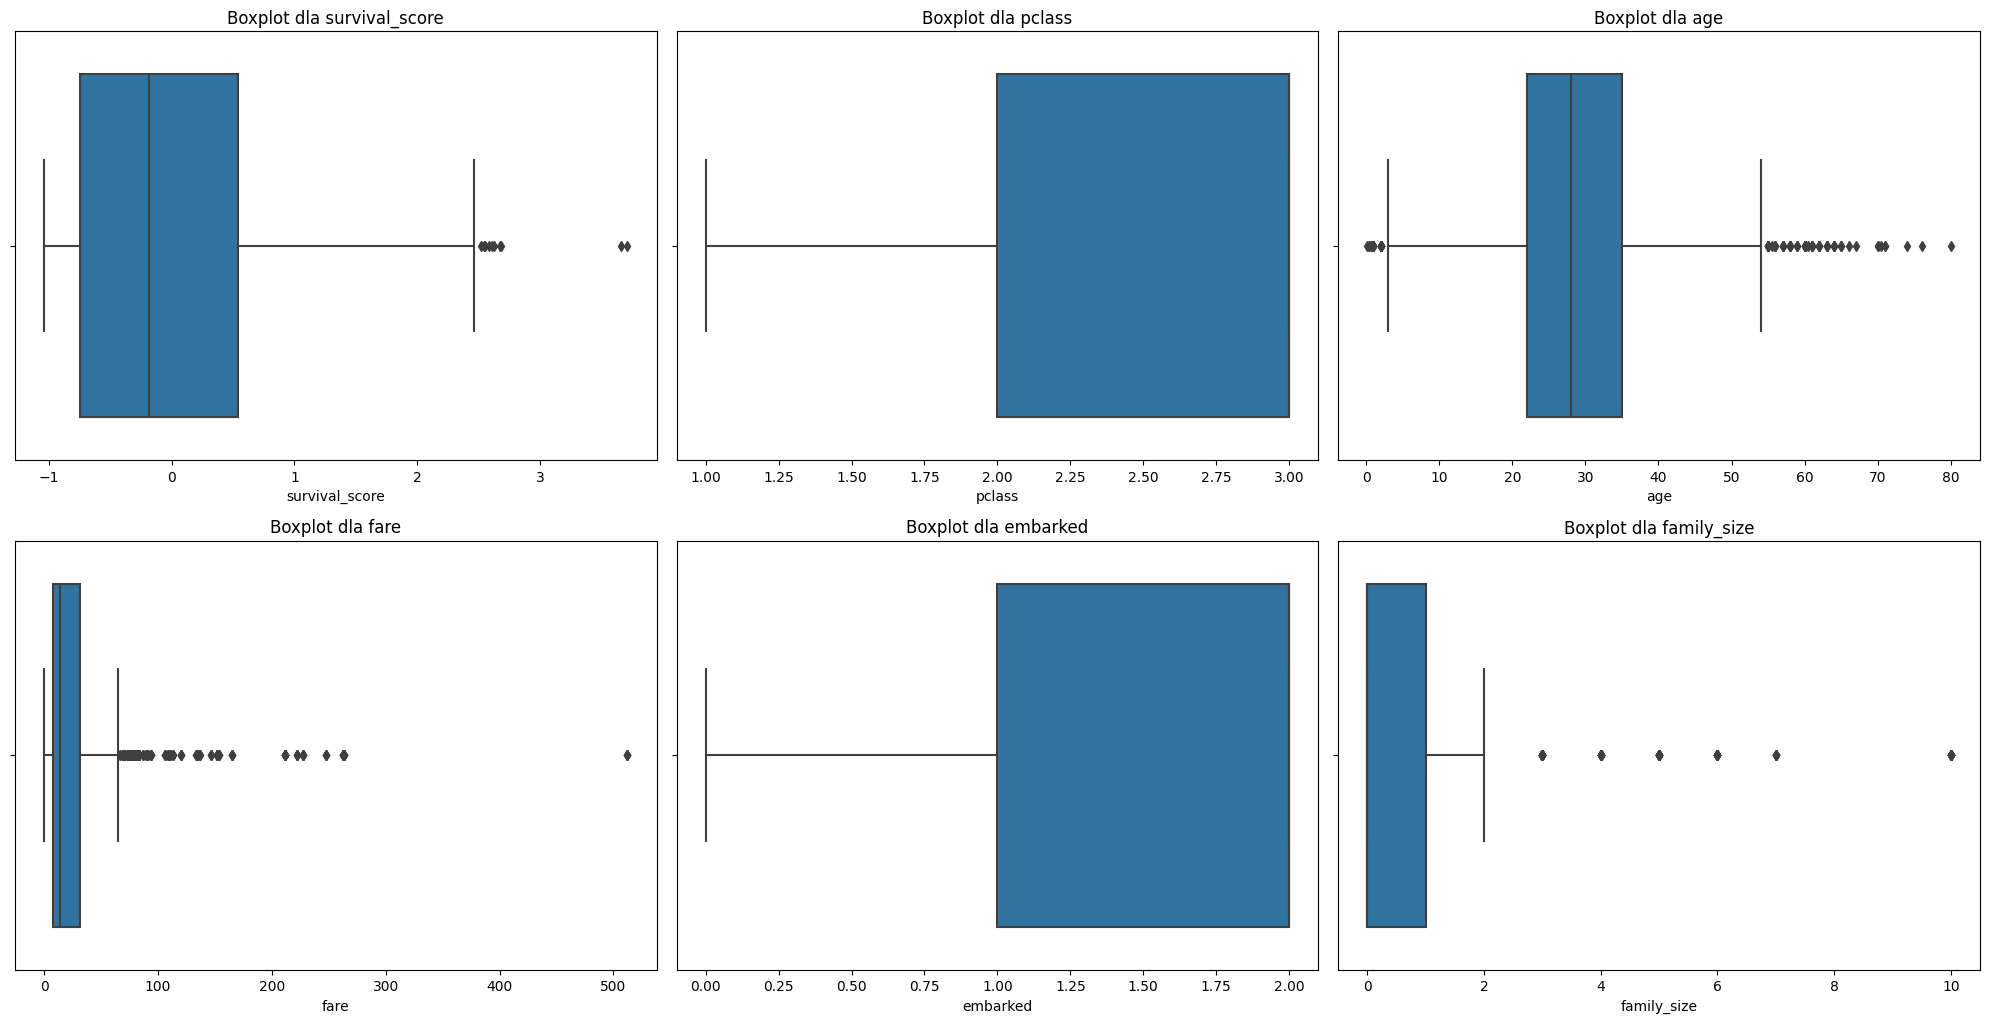

In [81]:
# Lista cech do wykresów
features = ['survival_score', 'pclass', 'age', 'fare', 'embarked', 'family_size']

# Tworzenie wykresów pudełkowych
plt.figure(figsize=(20, 15))
for i, feature in enumerate(features):
    plt.subplot(3, 3, i + 1)
    sns.boxplot(x=df[feature])
    plt.title(f'Boxplot dla {feature}')
    plt.xlabel(feature)

plt.tight_layout()
plt.show()


### Podsumowanie:

- Wartości odstające są szczególnie widoczne w przypadku zmiennych ciągłych, takich jak age i fare.
- Klasy biletów (pclass) i porty zaokrętowania (embarked) mają wartości kategoryczne, które nie wykazują wartości odstających.
- Zmienna family_size pokazuje wartości odstające dla dużych rodzin, co może sugerować rzadkie przypadki dużych rodzin podróżujących razem.

- W przypadku zmiennych takich jak age i fare, warto przeanalizować wpływ wartości odstających na modele predykcyjne i rozważyć ich ewentualne przekształcenie lub usunięcie.
- Wartości odstające mogą dostarczyć cennych informacji, ale również mogą zniekształcać wyniki analizy. Dlatego należy podjąć decyzje na podstawie kontekstu analizy i celów badania.

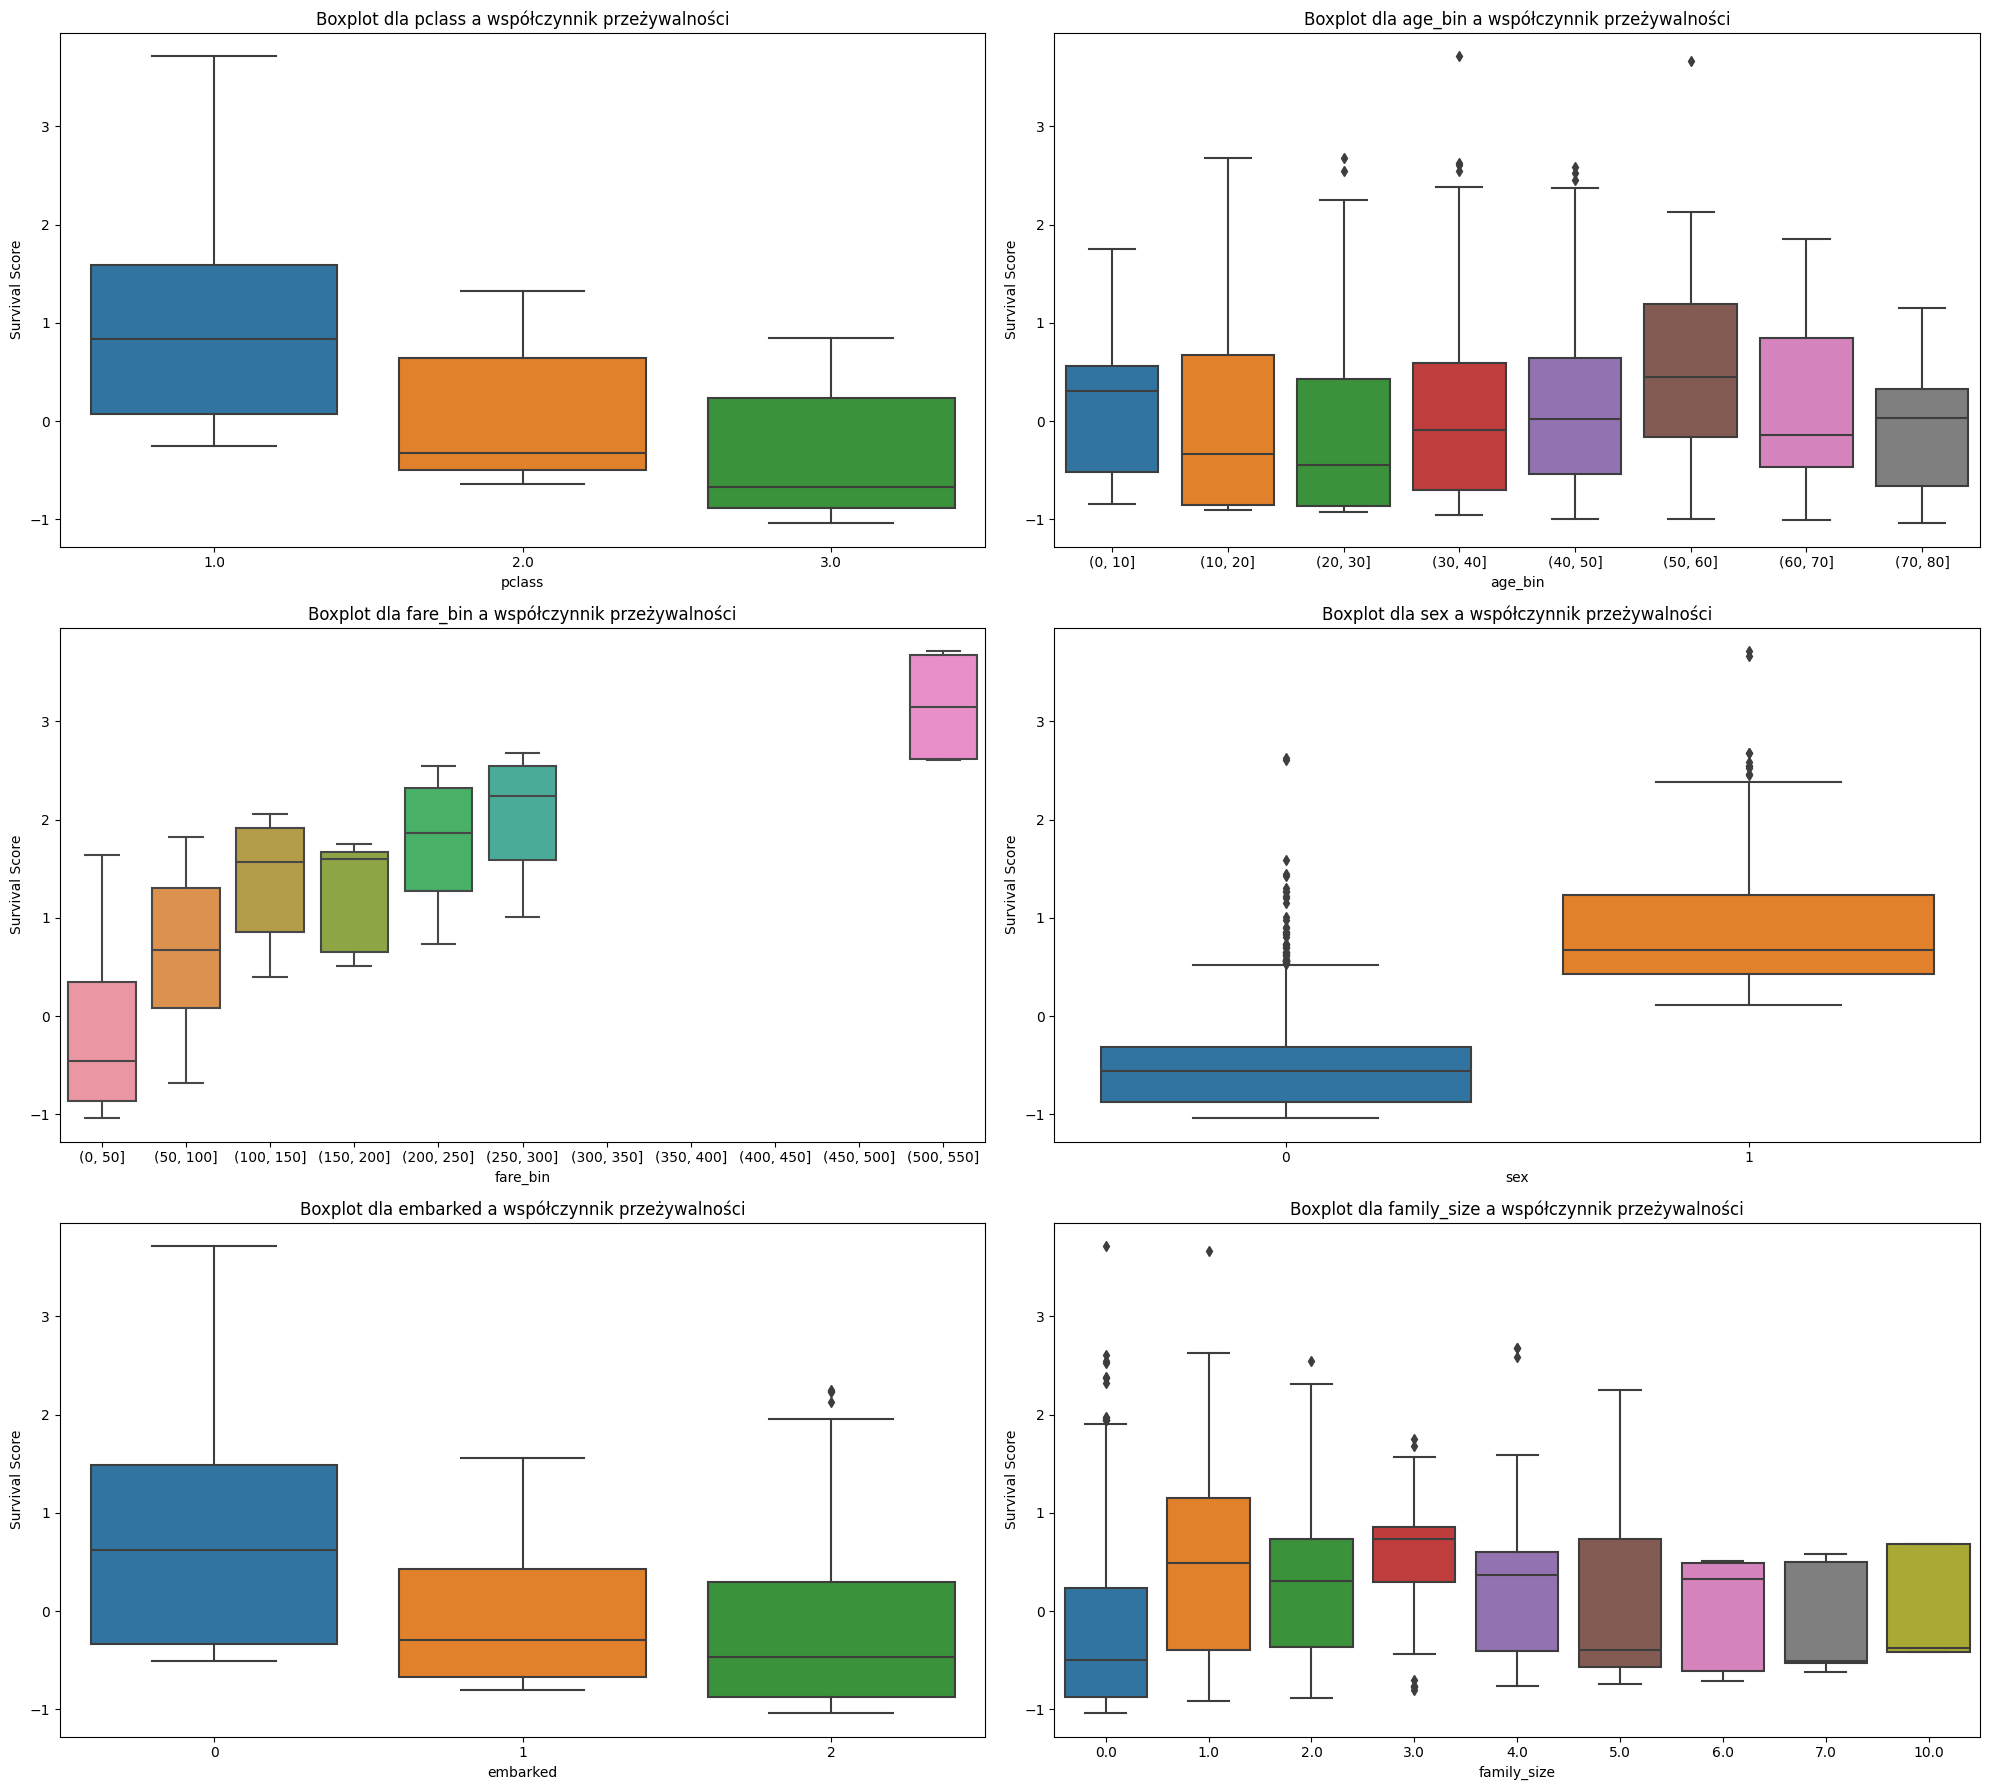

In [82]:
# Podział wieku na przedziały
df['age_bin'] = pd.cut(df['age'], bins=[0, 10, 20, 30, 40, 50, 60, 70, 80], labels=['(0, 10]', '(10, 20]', '(20, 30]', '(30, 40]', '(40, 50]', '(50, 60]', '(60, 70]', '(70, 80]'])

# Podział ceny biletu na przedziały
df['fare_bin'] = pd.cut(df['fare'], bins=[0, 50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 550], labels=['(0, 50]', '(50, 100]', '(100, 150]', '(150, 200]', '(200, 250]', '(250, 300]', '(300, 350]', '(350, 400]', '(400, 450]', '(450, 500]', '(500, 550]'])

# Lista cech do wykresów
features = ['pclass', 'age_bin', 'fare_bin', 'sex', 'embarked', 'family_size']

# Tworzenie wykresów pudełkowych
plt.figure(figsize=(20, 18))
for i, feature in enumerate(features):
    plt.subplot(3, 2, i + 1)
    sns.boxplot(x=df[feature], y=df['survival_score'])
    plt.title(f'Boxplot dla {feature} a współczynnik przeżywalności')
    plt.xlabel(feature)
    plt.ylabel('Survival Score')

plt.tight_layout()
plt.show()

### Podsumowanie:

- Klasa biletu, cena biletu i płeć są kluczowymi czynnikami wpływającymi na przeżywalność pasażerów Titanica.
- Wiek, port zaokrętowania i liczba członków rodziny również mają wpływ, ale są mniej jednoznaczne w swoich trendach.
- Analiza wartości odstających wskazuje na obecność ekstremalnych przypadków w każdej z grup, co może sugerować różne strategie przetrwania lub inne czynniki wpływające na przeżywalność.

In [83]:
# Wyświetlanie 10 osób z największą szansą na przeżycie
top_10_survival = df.nlargest(10, 'survival_score')
print("10 osób z największą szansą na przeżycie:")
print(top_10_survival[['pclass', 'age', 'fare', 'sex', 'embarked', 'family_size', 'survival_score']])

# Wyświetlanie 10 osób z najmniejszą szansą na przeżycie
bottom_10_survival = df.nsmallest(10, 'survival_score')
print("\n10 osób z najmniejszą szansą na przeżycie:")
print(bottom_10_survival[['pclass', 'age', 'fare', 'sex', 'embarked', 'family_size', 'survival_score']])


10 osób z największą szansą na przeżycie:
     pclass   age      fare  sex  embarked  family_size  survival_score
302     1.0  35.0  512.3292    1         0          0.0        3.713157
50      1.0  58.0  512.3292    1         0          1.0        3.660770
250     1.0  18.0  262.3750    1         0          4.0        2.681486
251     1.0  21.0  262.3750    1         0          4.0        2.672181
49      1.0  36.0  512.3292    0         0          1.0        2.621921
183     1.0  35.0  512.3292    0         0          0.0        2.606067
253     1.0  48.0  262.3750    1         0          4.0        2.588430
66      1.0  36.0  262.3750    1         0          0.0        2.549829
97      1.0  27.0  247.5208    1         0          2.0        2.546708
35      1.0  45.0  262.3750    1         0          0.0        2.521912

10 osób z najmniejszą szansą na przeżycie:
      pclass   age     fare  sex  embarked  family_size  survival_score
1235     3.0  74.0   7.7750    0         2        

### Podsumowanie:

**10 osób z największą szansą na przeżycie**:

- **Klasa biletu**- wszyscy pasażerowie z największą szansą na przeżycie byli pasażerami 1. klasy.
- **Płeć**- większość osób z wysokim współczynnikiem przeżywalności to kobiety, co sugeruje, że płeć miała znaczący wpływ na przeżycie.
- **Wiek**- wiek tych pasażerów mieści się w przedziale od 18 do 58 lat, co sugeruje, że osoby w tym przedziale wiekowym miały większe szanse na przeżycie.
- **Cena biletu**- wysokie ceny biletów (powyżej 247 jednostek) są zauważalne wśród osób z największą szansą na przeżycie.
- **Port zaokrętowania**- większość z tych pasażerów zaokrętowała w porcie Cherbourg (oznaczonym jako 0).
- **Liczba członków rodziny**- pasażerowie ci mają zmienną liczbę członków rodziny na pokładzie, od 0 do 4.

**10 osób z najmniejszą szansą na przeżycie**:

- **Klasa biletu**- wszyscy pasażerowie z najmniejszą szansą na przeżycie byli pasażerami 3. klasy.
- **Płeć**- wszyscy ci pasażerowie to mężczyźni, co sugeruje, że płeć miała znaczący wpływ na przeżycie.
- **Wiek**- wynosi od 49 do 74 lat, co sugeruje, że starsze osoby miały mniejsze szanse na przeżycie.
- **Cena biletu**- niskie ceny biletów (poniżej 15 jednostek) są zauważalne wśród osób z najmniejszą szansą na przeżycie.
- **Port zaokrętowania**- większość z tych pasażerów zaokrętowała w porcie Southampton (oznaczonym jako 2).
- **Liczba członków rodziny**- pasażerowie ci podróżowali bez rodziny na pokładzie (liczba członków rodziny = 0).

## 6. Wnioski z analizy danych i PCA

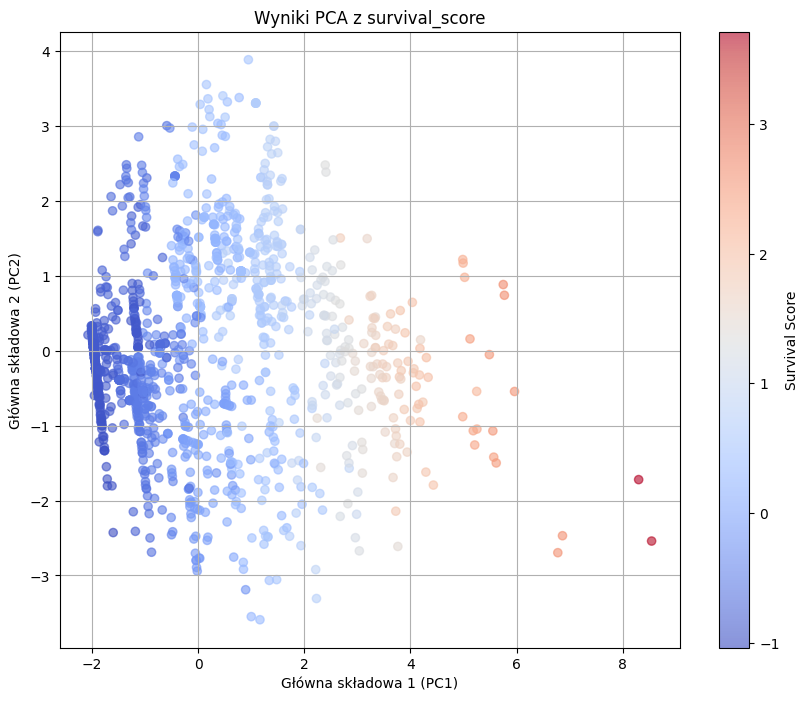

In [87]:
# Dodanie kolumny survival_score
df_pca['survival_score'] = df['survival_score']

# Standaryzacja danych
scaler = StandardScaler()
df_pca_scaled = scaler.fit_transform(df_pca)

# Przeprowadzenie PCA
pca = PCA(n_components=2)
pca_components = pca.fit_transform(df_pca_scaled)

# Tworzenie ramki danych z wynikami PCA
df_pca_results = pd.DataFrame(data=pca_components, columns=['PC1', 'PC2'])

# Dodanie kolumny 'survival_score' do wyników PCA, aby móc kolorować punkty na wykresie
df_pca_results['survival_score'] = df['survival_score'].values

# Wizualizacja wyników PCA
plt.figure(figsize=(10, 8))
scatter = plt.scatter(x=df_pca_results['PC1'], y=df_pca_results['PC2'], c=df_pca_results['survival_score'], cmap='coolwarm', alpha=0.6)
plt.colorbar(scatter, label='Survival Score')
plt.title('Wyniki PCA z survival_score')
plt.xlabel('Główna składowa 1 (PC1)')
plt.ylabel('Główna składowa 2 (PC2)')
plt.grid(True)
plt.savefig('pcatitanic.png', dpi=300)
plt.show()

### **Kluczowe Wnioski z Analiz**

- Z wykresu PCA wynika, że pasażerowie o niższym współczynniku przeżywalności (w odcieniach niebieskiego) są bardziej skoncentrowani w dolnej lewej części wykresu.
- Pasażerowie o wyższym współczynniku przeżywalności (w odcieniach czerwieni) są bardziej rozproszeni, ale zauważalnie skupiają się w górnej prawej części wykresu.
- Te różnice sugerują, że główne składowe skutecznie oddzielają grupy pasażerów o różnych szansach na przeżycie.
- Pierwsza główna składowa (PC1) wydaje się mieć większy wpływ na rozróżnienie pasażerów o różnym współczynniku przeżywalności, co sugeruje, że zmienne mające największy wpływ na PC1 są kluczowe dla przeżycia.
- Druga główna składowa (PC2) również przyczynia się do rozróżnienia, ale w mniejszym stopniu.

Analiza danych pasażerów Titanica ujawniła, że płeć, klasa biletu i cena biletu były najważniejszymi czynnikami wpływającymi na przeżywalność. Wiek, liczba członków rodziny i port zaokrętowania miały mniejszy wpływ, ale nadal były istotne w kontekście specyficznych sytuacji pasażerów. Wykorzystanie PCA pozwoliło na wizualizację tych różnic i potwierdzenie, że główne składowe skutecznie oddzielają grupy pasażerów o różnych szansach na przeżycie, co jest zgodne z wcześniejszymi analizami.